# Install libraries and load data

In [1]:
library(Seurat)
library(ggplot2)
library(reshape2)
library(dplyr)
library('data.table')
library(stringr)
library(dplyr)
library(RColorBrewer)
#library("ComplexHeatmap")

Attaching SeuratObject


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following objects are masked from ‘package:reshape2’:

    dcast, melt




In [ ]:
#install.packages("ggpubr")


In [2]:
library("ggpubr")

In [4]:
install.packages("cowplot")

Installing package into ‘/home/jupyter/notebooks/packages’
(as ‘lib’ is unspecified)



In [3]:
library(cowplot)


Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend




In [4]:
project <- Sys.getenv('WORKSPACE_NAMESPACE')
workspace <- Sys.getenv('WORKSPACE_NAME')
bucket <- Sys.getenv('WORKSPACE_BUCKET')
project
workspace
bucket

RDS_Files <- "gs://fc-943d6020-b7d7-4091-b0d4-51cc6cb7617e/macrophage_input_data/*.rds"


system(sprintf("gsutil ls %s", RDS_Files), intern=T)

system("mkdir $(pwd)/RDS_Files")
system(sprintf("gsutil -m cp %s $(pwd)/RDS_Files/", RDS_Files))

list.files(path = "./RDS_Files")

[1] "shalek-lab-firecloud"

[1] "MITMilkStudy_ShalekLab"

[1] "gs://fc-943d6020-b7d7-4091-b0d4-51cc6cb7617e"

[1] "gs://fc-943d6020-b7d7-4091-b0d4-51cc6cb7617e/macrophage_input_data/seuratobj_immune_macs_analysis_subset.rds"

[1] "seuratobj_immune_macs_analysis_subset.rds"

In [5]:
seurat.all.data.sub  <- readRDS("./RDS_Files/seuratobj_immune_macs_analysis_subset.rds")


In [6]:
seurat.all.data.sub
colnames(seurat.all.data.sub@meta.data)

An object of class Seurat 
25607 features across 6349 samples within 2 assays 
Active assay: RNA (25593 features, 2000 variable features)
 1 other assay present: progeny
 3 dimensional reductions calculated: pca, tsne, umap

[1] "orig.ident"                                
 [2] "nCount_RNA"                                
 [3] "nFeature_RNA"                              
 [4] "sample"                                    
 [5] "samplename_seurat_obj"                     
 [6] "include_for_analysis"                      
 [7] "baby_born"                                 
 [8] "date_processed"                            
 [9] "time_post_partum_days"                     
[10] "time_post_partum_weeks"                    
[11] "milk_stage"                                
[12] "donor"                                     
[13] "milk_processing"                           
[14] "infant_sick_YN"                            
[15] "weaning_YN"                                
[16] "mastisis_YN"                               
[17] "breast_soreness_YN"                        
[18] "directly_breastfeeding_YN"                 
[19] "any_formula_YN"                            
[20] "sample_origin_left_right_na_both"          
[21] "donor_reported_favored_breast"             
[22] "sequencing_runs"                           
[23] "mother_medications_YN"                     
[24] "medications_list"                          
[25] "reported_menstruating_YN"                  
[26] "maternal_medical_event_YN"                 
[27] "maternal_medical_event_description"        
[28] "hormonal_birthcontrol_YN"                  
[29] "daycare_YN"                                
[30] "vaccines_reported_YN"                      
[31] "vaccines_list"                             
[32] "solid_foods_YN"                            
[33] "reported_infant_medical_events_YN"         
[34] "reported_infant_medical_events_description"
[35] "health_issues_reported_notes"              
[36] "new_samplename.1"                          
[37] "old.samplename"                            
[38] "sample_volume_mL"                          
[39] "live_cell_count_total_millions"            
[40] "dead_cell_count_total_millions"            
[41] "live_per_mL"                               
[42] "dead_per_mL"                               
[43] "sample_collection_time"                    
[44] "time_arrays_sealed"                        
[45] "time_to_sealing_h_mm"                      
[46] "array_batch"                               
[47] "sample_provided_in"                        
[48] "Bead.Lot"                                  
[49] "Notes"                                     
[50] "Unnamed..46"                               
[51] "Unnamed..47"                               
[52] "per_timepoint_celltypes"                   
[53] "per_timepoint_leiden"                      
[54] "n_genes_by_counts"                         
[55] "log1p_n_genes_by_counts"                   
[56] "total_counts"                              
[57] "log1p_total_counts"                        
[58] "pct_counts_in_top_50_genes"                
[59] "pct_counts_in_top_100_genes"               
[60] "pct_counts_in_top_200_genes"               
[61] "pct_counts_in_top_500_genes"               
[62] "percent_mito"                              
[63] "UMI_to_gene_ratio"                         
[64] "n_UMI_sample_percentile"                   
[65] "n_genes_sample_percentile"                 
[66] "UMI_to_gene_ratio_sample_percentile"       
[67] "doublet_scores"                            
[68] "predicted_doublet"                         
[69] "n_counts"                                  
[70] "milk.stage.ordered"                        
[71] "leiden"                                    
[72] "RNA_snn_res.0.4"                           
[73] "seurat_clusters"                           
[74] "RNA_snn_res.0.2"                           
[75] "RNA_snn_res.0.1"                           
[76] "RNA_snn_res.0.5"                           
[77] "RNA_snn_res.1"                             
[78] "RNA_snn_res.1.5"                           
[79] "RNA_snn_res.2"                             
[80] "initial_cell_IDs"                          
[

In [31]:
unique(seurat.all.data.sub@meta.data$immune_cell_final_ids)

[1] macrophage      milk_macrophage
8 Levels: macrophage milk_macrophage neutrophils T cells ... eosinophils

# color pallettes

In [7]:
cols.milk.stage <- brewer.pal(7,"Blues")
cols.cell.types <- brewer.pal(7,"Paired")
cols.donor <- c("#FF0000", "#00A08A", "#F2AD00", "#F98400", "#5BBCD6",
               "#ECCBAE", "#046C9A", "#D69C4E", "#ABDDDE", "#000000",
               "#D8B70A","#F1BB7B", "#FD6467", "#5B1A18", "#D67236")
cols.newcellIDs <- c("#EE46A6","#E6A0C4")
#na.no.yes.cols <- c("snow3","violet","violetred3")
na.no.yes.cols <- c("lightgrey","mediumpurple1","mediumpurple4")


# sub-clustering data

Centering and scaling data matrix

PC_ 1 
Positive:  PIGR, XDH, LTF, CSN1S1, CSN3, BTN1A1, CSN2, CLU, ELF5, MFGE8 
	   CEL, LALBA, FABP3, OLAH, EHF, NTRK2, CHRDL2, FASN, TC2N, CA6 
	   KRT19, NFIB, SLC34A2, ALDH1A3, AIF1L, KRT7, TMC5, MUC1, FOLR1, RP11-536O18.2 
Negative:  LTA4H, SNX10, APOC1, MS4A7, TGM2, SEMA3C, CD52, TFRC, KLHL6, CTSL 
	   SCD, MEGF9, C19orf59, UGCG, ALDH2, GPCPD1, RMDN3, HTRA4, CES1, S100A6 
	   GCHFR, MARCO, DOCK11, NR1H3, SNTB1, BHLHE41, CD9, FDX1, MFAP5, GPRIN3 
PC_ 2 
Positive:  APOE, CD36, CD52, TREM2, PLD3, KCNJ5, SPP1, APOC1, CD163, HS3ST2 
	   EMP1, CHI3L1, VSIG4, NR1H3, CHIT1, ALDH1A1, GALM, FAIM3, LGMN, SPARC 
	   ATP6V0D2, CD14, FDX1, S100A6, MX1, MSR1, BHLHE41, SNTB1, NUPR1, IFIT3 
Negative:  VEGFA, RGS2, PDE4B, BTG1, NR4A2, NAMPT, ZFP36, SOCS3, NR4A3, SERPINB9 
	   ETS2, INHBA, TNFAIP3, OLR1, CD300E, JUNB, FOSL2, DSE, DUSP4, ARL4C 
	   EREG, HBEGF, NFKBIA, SATB1, GRASP, C15orf48, PNRC1, FOSB, SIPA1L1, FCN1 
PC_ 3 
Positive:  MPEG1, TGFBI, MARCKS, CD14,

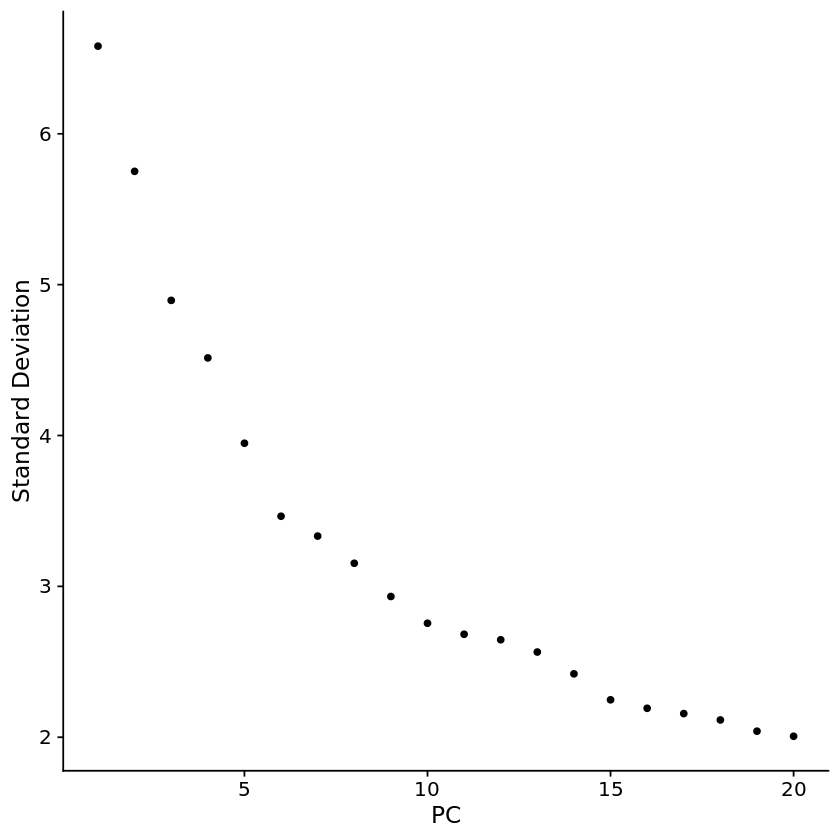

In [33]:
## normalize and initial clustering 
seurat.all.data.sub <- NormalizeData(seurat.all.data.sub, normalization.method = "LogNormalize", scale.factor = 10000)
seurat.all.data.sub <- FindVariableFeatures(seurat.all.data.sub, selection.method = "vst", nfeatures = 2000)
seurat.all.data.sub <- ScaleData(seurat.all.data.sub, features = rownames(seurat.all.data.sub))
seurat.all.data.sub <- RunPCA(seurat.all.data.sub, features = VariableFeatures(object = seurat.all.data.sub))
ElbowPlot(seurat.all.data.sub)

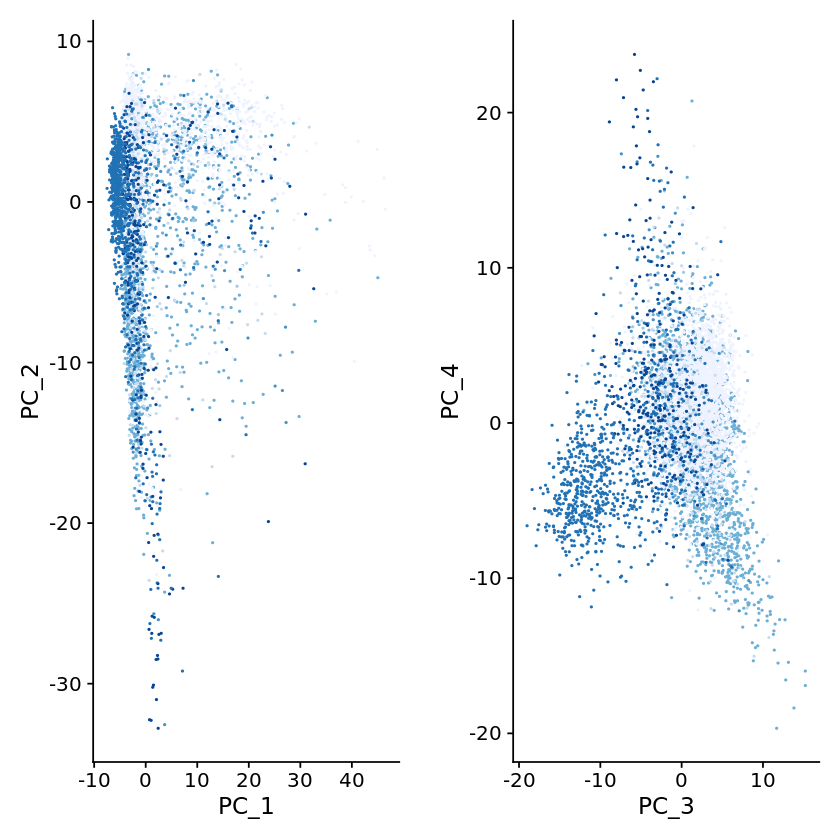

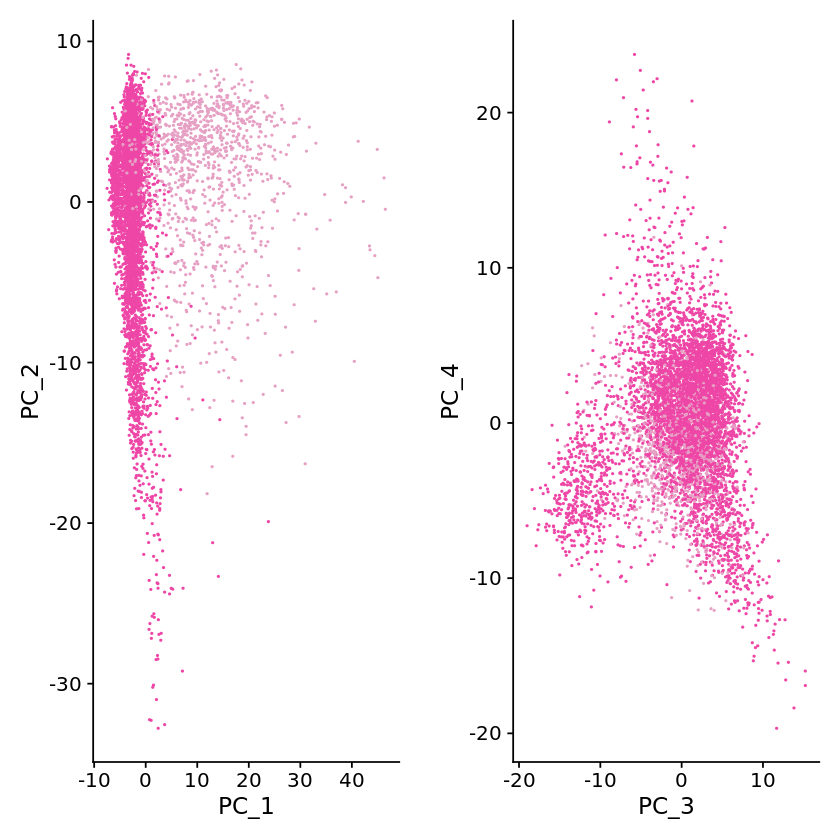

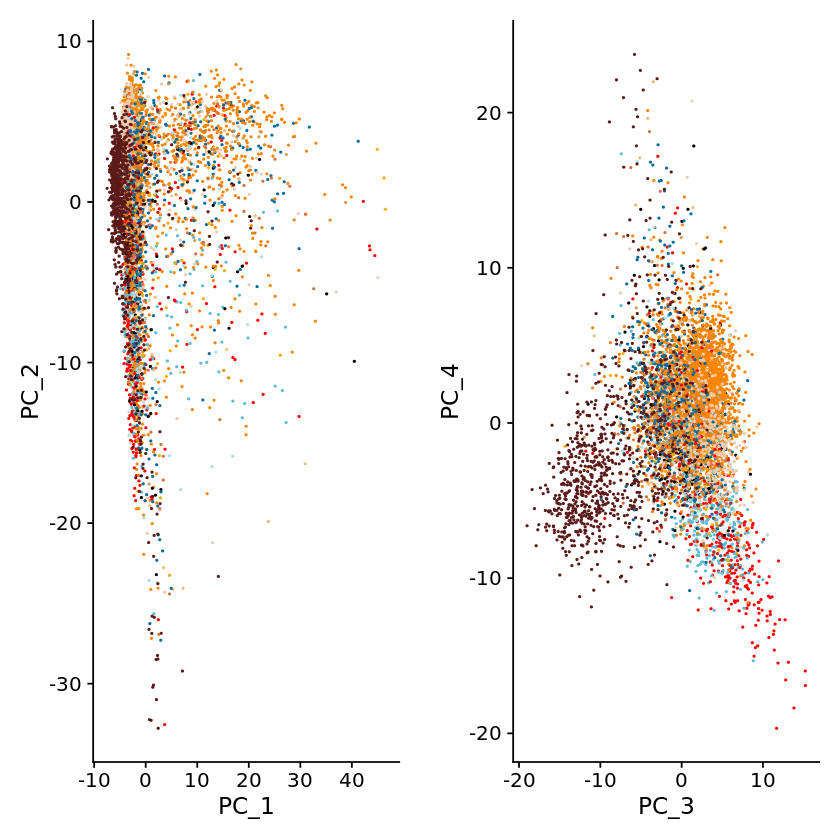

In [34]:
## PC plots
Idents(object=seurat.all.data.sub) <- "milk_stage_ordered"
stage1 <- DimPlot(seurat.all.data.sub, reduction = "pca", dims = c(1,2), cols = cols.milk.stage) + NoLegend()
stage2 <- DimPlot(seurat.all.data.sub, reduction = "pca", dims = c(3,4), cols = cols.milk.stage)+ NoLegend()
plot_grid(stage1,stage2)

Idents(object=seurat.all.data.sub) <- "immune_cell_final_ids"
immuneIDs1 <- DimPlot(seurat.all.data.sub, reduction = "pca", dims = c(1,2), cols = cols.newcellIDs)+ NoLegend()
immuneIDs2 <- DimPlot(seurat.all.data.sub, reduction = "pca", dims = c(3,4), cols = cols.newcellIDs)+ NoLegend()
plot_grid(immuneIDs1,immuneIDs2)

Idents(object=seurat.all.data.sub) <- "donor"
donor1 <- DimPlot(seurat.all.data.sub, reduction = "pca", dims = c(1,2), cols = cols.donor)+ NoLegend()
donor2 <- DimPlot(seurat.all.data.sub, reduction = "pca", dims = c(3,4), cols = cols.donor)+ NoLegend()
plot_grid(donor1,donor2)


In [35]:
# tSNEs for figures 
seurat.all.data.sub<- RunTSNE(seurat.all.data.sub, reduction = "pca", dims = 1:20)
seurat.all.data.sub<- RunUMAP(seurat.all.data.sub, reduction = "pca", dims = 1:20)
seurat.all.data.sub<- FindNeighbors(seurat.all.data.sub, reduction = "pca", dims = 1:20)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
19:16:57 UMAP embedding parameters a = 0.9922 b = 1.112

19:16:57 Read 6349 rows and found 20 numeric columns

19:16:57 Using Annoy for neighbor search, n_neighbors = 30

19:16:57 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

19:16:58 Writing NN index file to temp file /tmp/RtmpESfmHm/file2c10e53c6e

19:16:58 Searching Annoy index using 1 thread, search_k = 3000

19:17:01 Annoy recall = 100%

19:17:01 Commencing smooth kNN distance calibration using 1 thread

19:17:02 Initializing from 

In [36]:
# Fix N, NA, and Yes for each category 

meta.data <- seurat.all.data.sub@meta.data
colnames(meta.data)

[1] "orig.ident"                                
 [2] "nCount_RNA"                                
 [3] "nFeature_RNA"                              
 [4] "sample"                                    
 [5] "samplename_seurat_obj"                     
 [6] "include_for_analysis"                      
 [7] "baby_born"                                 
 [8] "date_processed"                            
 [9] "time_post_partum_days"                     
[10] "time_post_partum_weeks"                    
[11] "milk_stage"                                
[12] "donor"                                     
[13] "milk_processing"                           
[14] "infant_sick_YN"                            
[15] "weaning_YN"                                
[16] "mastisis_YN"                               
[17] "breast_soreness_YN"                        
[18] "directly_breastfeeding_YN"                 
[19] "any_formula_YN"                            
[20] "sample_origin_left_right_na_both"          
[21] "donor_reported_favored_breast"             
[22] "sequencing_runs"                           
[23] "mother_medications_YN"                     
[24] "medications_list"                          
[25] "reported_menstruating_YN"                  
[26] "maternal_medical_event_YN"                 
[27] "maternal_medical_event_description"        
[28] "hormonal_birthcontrol_YN"                  
[29] "daycare_YN"                                
[30] "vaccines_reported_YN"                      
[31] "vaccines_list"                             
[32] "solid_foods_YN"                            
[33] "reported_infant_medical_events_YN"         
[34] "reported_infant_medical_events_description"
[35] "health_issues_reported_notes"              
[36] "new_samplename.1"                          
[37] "old.samplename"                            
[38] "sample_volume_mL"                          
[39] "live_cell_count_total_millions"            
[40] "dead_cell_count_total_millions"            
[41] "live_per_mL"                               
[42] "dead_per_mL"                               
[43] "sample_collection_time"                    
[44] "time_arrays_sealed"                        
[45] "time_to_sealing_h_mm"                      
[46] "array_batch"                               
[47] "sample_provided_in"                        
[48] "Bead.Lot"                                  
[49] "Notes"                                     
[50] "Unnamed..46"                               
[51] "Unnamed..47"                               
[52] "per_timepoint_celltypes"                   
[53] "per_timepoint_leiden"                      
[54] "n_genes_by_counts"                         
[55] "log1p_n_genes_by_counts"                   
[56] "total_counts"                              
[57] "log1p_total_counts"                        
[58] "pct_counts_in_top_50_genes"                
[59] "pct_counts_in_top_100_genes"               
[60] "pct_counts_in_top_200_genes"               
[61] "pct_counts_in_top_500_genes"               
[62] "percent_mito"                              
[63] "UMI_to_gene_ratio"                         
[64] "n_UMI_sample_percentile"                   
[65] "n_genes_sample_percentile"                 
[66] "UMI_to_gene_ratio_sample_percentile"       
[67] "doublet_scores"                            
[68] "predicted_doublet"                         
[69] "n_counts"                                  
[70] "milk.stage.ordered"                        
[71] "leiden"                                    
[72] "RNA_snn_res.0.4"                           
[73] "seurat_clusters"                           
[74] "RNA_snn_res.0.2"                           
[75] "RNA_snn_res.0.1"                           
[76] "RNA_snn_res.0.5"                           
[77] "RNA_snn_res.1"                             
[78] "RNA_snn_res.1.5"                           
[79] "RNA_snn_res.2"                             
[80] "initial_cell_IDs"                          
[

In [37]:
unique(meta.data$mastisis_YN)
unique(meta.data$reported_infant_medical_events_YN)
unique(meta.data$weaning_YN)
unique(meta.data$daycare_YN)

[1] "no"  "yes" "na"

[1] "no"  "yes" "na"

[1] "na"  "no"  "yes"

[1] "no"  "yes" "na"

In [38]:
unique(meta.data$reported_menstruating_YN)
reported_menstruating_YN_fixed <- gsub(x = meta.data$reported_menstruating_YN, pattern = "N", replacement = "no") 
unique(reported_menstruating_YN_fixed)

[1] "no" "N"  "na"

[1] "no" "na"

In [39]:
unique(meta.data$hormonal_birthcontrol_YN)
hormonal_birthcontrol_YN_fixed <- gsub(x = meta.data$hormonal_birthcontrol_YN, pattern = "yes ", replacement = "yes")
unique(hormonal_birthcontrol_YN_fixed)

[1] "no"   "yes"  "yes " "na"

[1] "no"  "yes" "na"

In [40]:
meta.data$reported_menstruating_YN_fixed <- reported_menstruating_YN_fixed
meta.data$hormonal_birthcontrol_YN_fixed <- hormonal_birthcontrol_YN_fixed
head(meta.data)

orig.ident     nCount_RNA nFeature_RNA
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA ImmuneDoublets 7689       2529        
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG ImmuneDoublets 3404       1435        
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG ImmuneDoublets 3899       1961        
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG ImmuneDoublets 8852       2617        
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG ImmuneDoublets 2981       1588        
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG ImmuneDoublets 2800       1499        
                                        sample        samplename_seurat_obj
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA BM02_6wkpp_r1 nan                  
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG BM02_6wkpp_r1 nan                  
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG BM02_6wkpp_r1 nan                  
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG BM02_6wkpp_r1 nan                  
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG BM02_6wkpp_r1 nan                  
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG BM02_6wkpp_r1 nan                  
                                        include_for_analysis baby_born
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA 1                    3/15/19  
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG 1                    3/15/19  
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG 1                    3/15/19  
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG 1                    3/15/19  
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG 1                    3/15/19  
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG 1                    3/15/19  
                                        date_processed time_post_partum_days
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA 4/24/19        40                   
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG 4/24/19        40                   
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG 4/24/19        40                   
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG 4/24/19        40                   
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG 4/24/19        40                   
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG 4/24/19        40                   
                                        time_post_partum_weeks ⋯
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA 5.71                   ⋯
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG 5.71                   ⋯
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG 5.71                   ⋯
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG 5.71                   ⋯
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG 5.71                   ⋯
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG 5.71                   ⋯
                                        mac_sub_cluster_firstpass
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA 1                        
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG 1                        
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG 1                        
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG 1                        
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG 1                        
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG 2                        
                                        UP_VirginvPregnancy1
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA 0.2750632           
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG 0.2636831           
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG 0.4045345           
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG 0.3471729           
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG 0.3790793           
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG 0.2836456           
                                        DOWN_VirginvPregnancy1
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA 0.08518915            
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG 0.09099286            
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG 0.05842712            
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG 0.09701162            
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG 0.10752292            
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG 0.11623705            
                                        UP_PregnancyvLactation1
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA  2.764957e-05          
immu_d

In [41]:
# add back to seurat obj 
dim(meta.data)
meta.data.fixed <- meta.data[,98:99]
head(meta.data.fixed)
seurat.all.data.sub <- AddMetaData(seurat.all.data.sub,metadata= meta.data.fixed)
head(seurat.all.data.sub@meta.data)

[1] 6349   99

reported_menstruating_YN_fixed
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA no                            
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG no                            
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG no                            
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG no                            
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG no                            
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG no                            
                                        hormonal_birthcontrol_YN_fixed
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA no                            
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG no                            
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG no                            
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG no                            
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG no                            
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG no

orig.ident     nCount_RNA nFeature_RNA
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA ImmuneDoublets 7689       2529        
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG ImmuneDoublets 3404       1435        
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG ImmuneDoublets 3899       1961        
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG ImmuneDoublets 8852       2617        
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG ImmuneDoublets 2981       1588        
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG ImmuneDoublets 2800       1499        
                                        sample        samplename_seurat_obj
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA BM02_6wkpp_r1 nan                  
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG BM02_6wkpp_r1 nan                  
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG BM02_6wkpp_r1 nan                  
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG BM02_6wkpp_r1 nan                  
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG BM02_6wkpp_r1 nan                  
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG BM02_6wkpp_r1 nan                  
                                        include_for_analysis baby_born
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA 1                    3/15/19  
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG 1                    3/15/19  
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG 1                    3/15/19  
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG 1                    3/15/19  
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG 1                    3/15/19  
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG 1                    3/15/19  
                                        date_processed time_post_partum_days
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA 4/24/19        40                   
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG 4/24/19        40                   
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG 4/24/19        40                   
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG 4/24/19        40                   
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG 4/24/19        40                   
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG 4/24/19        40                   
                                        time_post_partum_weeks ⋯
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA 5.71                   ⋯
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG 5.71                   ⋯
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG 5.71                   ⋯
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG 5.71                   ⋯
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG 5.71                   ⋯
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG 5.71                   ⋯
                                        mac_sub_cluster_firstpass
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA 1                        
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG 1                        
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG 1                        
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG 1                        
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG 1                        
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG 2                        
                                        UP_VirginvPregnancy1
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA 0.2750632           
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG 0.2636831           
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG 0.4045345           
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG 0.3471729           
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG 0.3790793           
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG 0.2836456           
                                        DOWN_VirginvPregnancy1
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA 0.08518915            
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG 0.09099286            
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG 0.05842712            
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG 0.09701162            
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG 0.10752292            
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG 0.11623705            
                                        UP_PregnancyvLactation1
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA  2.764957e-05          
immu_d

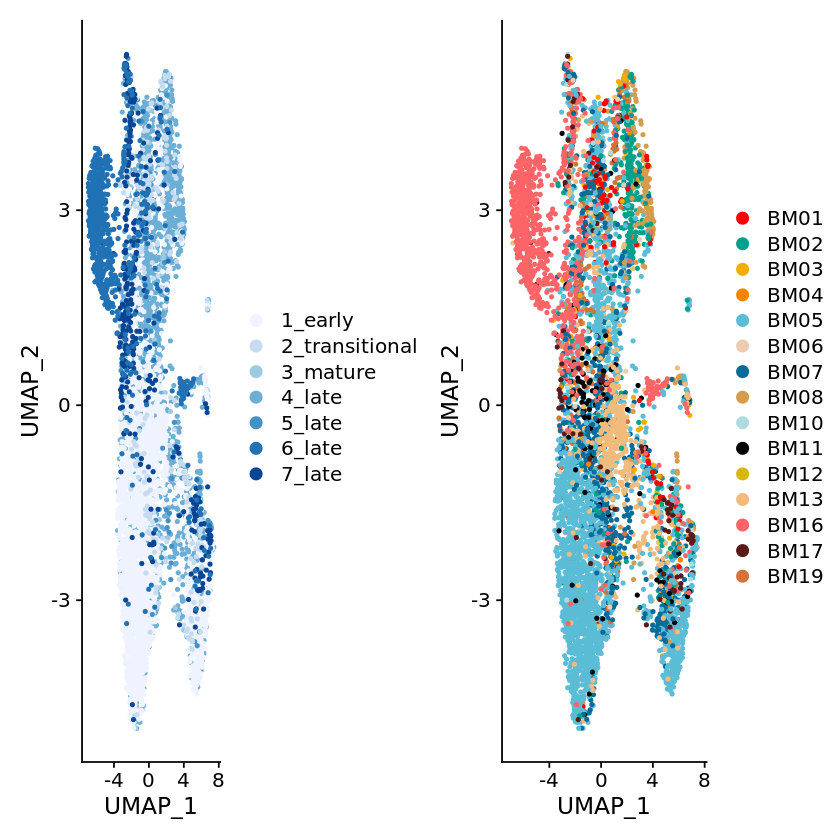

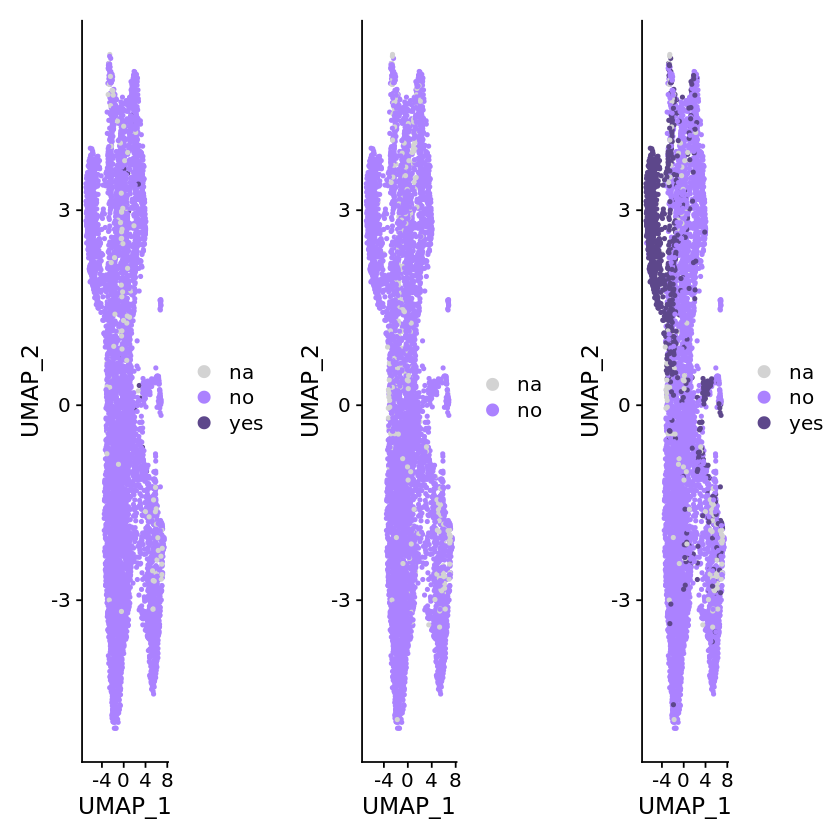

In [42]:
# colored by other features (LEGEND)

####### donor level metadata
# milk stage 
stagetsne <- DimPlot(seurat.all.data.sub, reduction = "umap", group.by = "milk_stage_ordered", pt.size = 0.8, cols = cols.milk.stage) + theme(legend.justification = "left")

# donor
donortsne <- DimPlot(seurat.all.data.sub, reduction = "umap", group.by = "donor", pt.size = 0.8, cols = cols.donor) + theme(legend.justification = "left")

# mastisis_YN
mast <- DimPlot(seurat.all.data.sub, reduction = "umap", group.by = "mastisis_YN", pt.size = 0.8, cols = na.no.yes.cols) + theme(legend.justification = "left")

# reported_menstruating_YN
mens <- DimPlot(seurat.all.data.sub, reduction = "umap", group.by = "reported_menstruating_YN_fixed", pt.size = 0.8, cols = na.no.yes.cols) + theme(legend.justification = "left")

# hormonal_birthcontrol_YN
bc <- DimPlot(seurat.all.data.sub, reduction = "umap", group.by = "hormonal_birthcontrol_YN_fixed", pt.size = 0.8, cols = na.no.yes.cols) + theme(legend.justification = "left")

plot_grid(stagetsne, donortsne)
plot_grid(mast, mens, bc, nrow = 1)


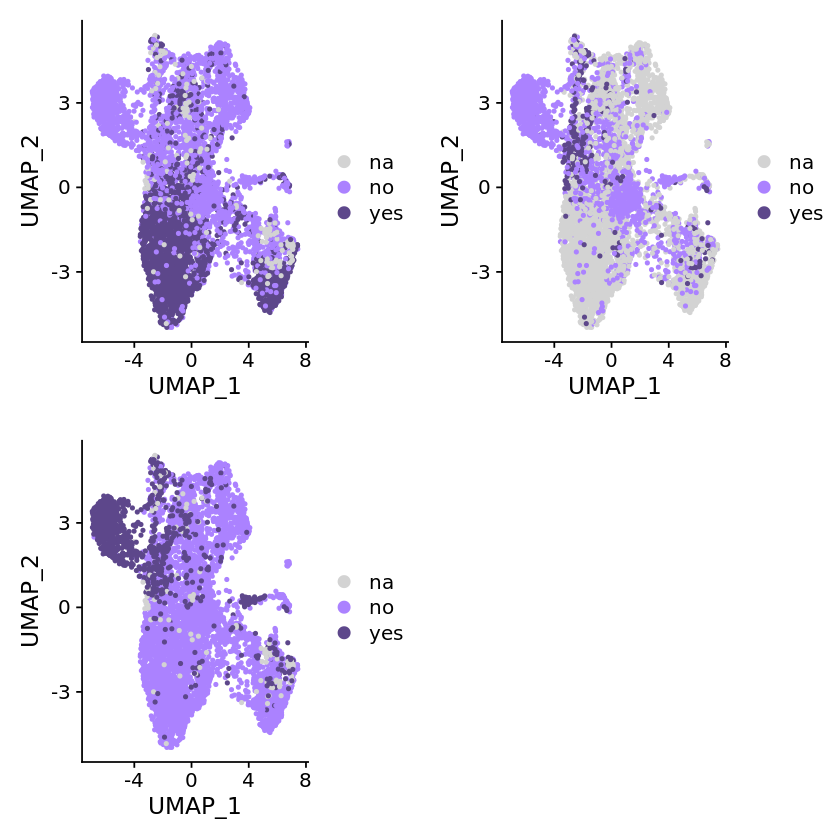

In [44]:
####### infant status tsne 
# infant_sick_YN
infsick <- DimPlot(seurat.all.data.sub, reduction = "umap", group.by = "reported_infant_medical_events_YN", pt.size = 0.8, cols = na.no.yes.cols)

# weaning_YN
weaning <- DimPlot(seurat.all.data.sub, reduction = "umap", group.by = "weaning_YN", pt.size = 0.8,cols = na.no.yes.cols)

# daycare_YN
daycare <- DimPlot(seurat.all.data.sub, reduction = "umap", group.by = "daycare_YN", pt.size = 0.8,cols = na.no.yes.cols)

plot_grid(infsick,weaning,daycare)


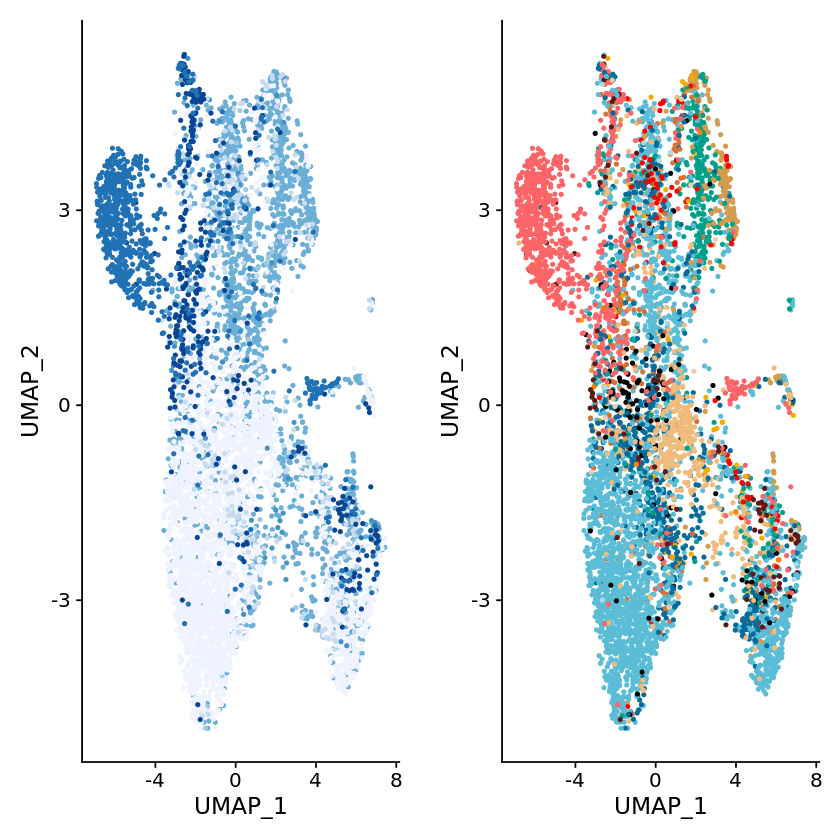

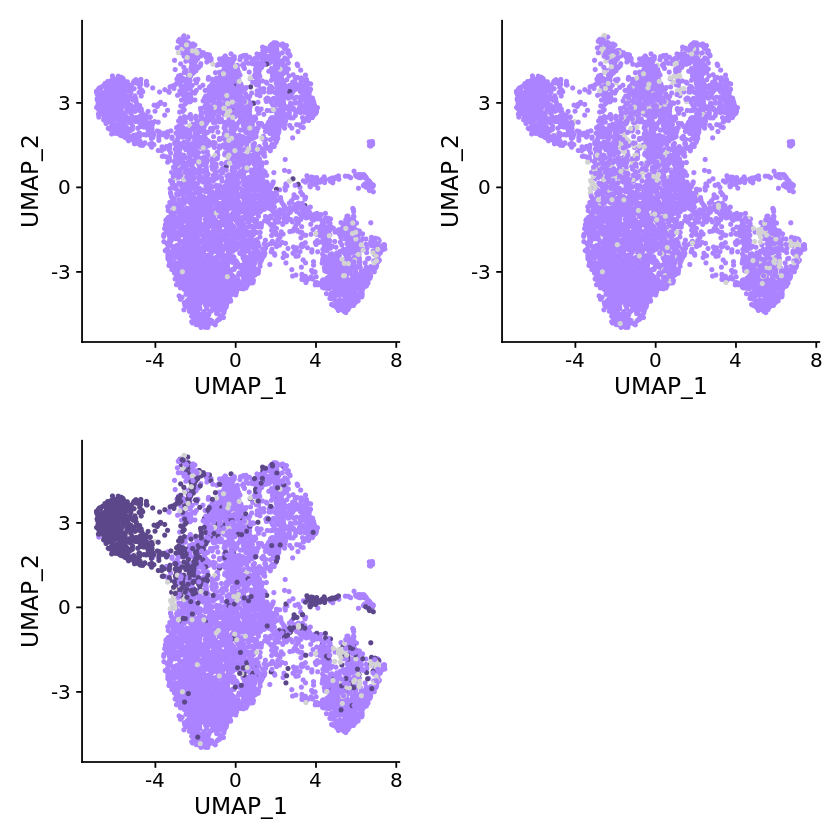

In [45]:
# colored by other features (NO LEGEND)

####### donor level metadata
# milk stage 
stagetsne.NOL <- DimPlot(seurat.all.data.sub, reduction = "umap", group.by = "milk_stage_ordered", pt.size = 0.8, cols = cols.milk.stage) + NoLegend()

# donor
donortsne.NOL <- DimPlot(seurat.all.data.sub, reduction = "umap", group.by = "donor", pt.size = 0.8, cols = cols.donor) + NoLegend()

# mastisis_YN
mast.NOL <- DimPlot(seurat.all.data.sub, reduction = "umap", group.by = "mastisis_YN", pt.size = 0.8, cols = na.no.yes.cols) + NoLegend()

# reported_menstruating_YN
mens.NOL <- DimPlot(seurat.all.data.sub, reduction = "umap", group.by = "reported_menstruating_YN_fixed", pt.size = 0.8, cols = na.no.yes.cols) + NoLegend()

# hormonal_birthcontrol_YN
bc.NOL <- DimPlot(seurat.all.data.sub, reduction = "umap", group.by = "hormonal_birthcontrol_YN_fixed", pt.size = 0.8, cols = na.no.yes.cols) + NoLegend()

plot_grid(stagetsne.NOL, donortsne.NOL)
plot_grid(mast.NOL, mens.NOL, bc.NOL)

In [46]:
seurat.all.data.sub <- FindClusters(seurat.all.data.sub, resolution = 0.2)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 6349
Number of edges: 211154

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8998
Number of communities: 5
Elapsed time: 1 seconds


In [16]:
cols.subclusters <- brewer.pal(5,"Greens")

Warning message:
“Using `as.character()` on a quosure is deprecated as of rlang 0.3.0.
Please use `as_label()` or `as_name()` instead.
This warning is displayed once per session.”


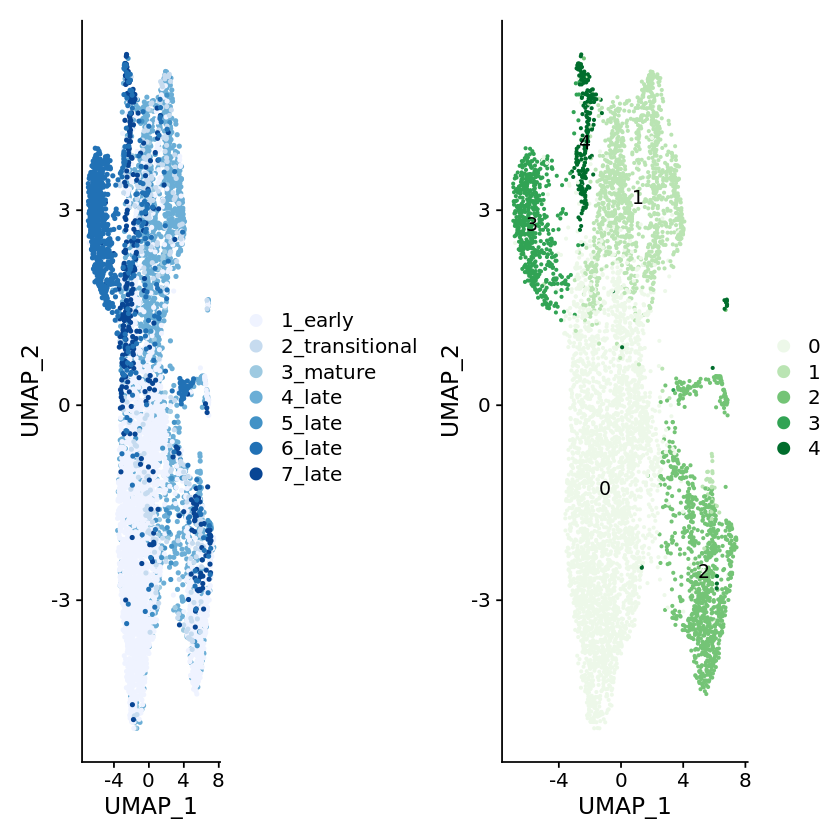

In [48]:
subclust <- DimPlot(seurat.all.data.sub, reduction = "umap", label = TRUE, pt.size = 0.5, cols = cols.subclusters)
plot_grid(stagetsne, subclust)

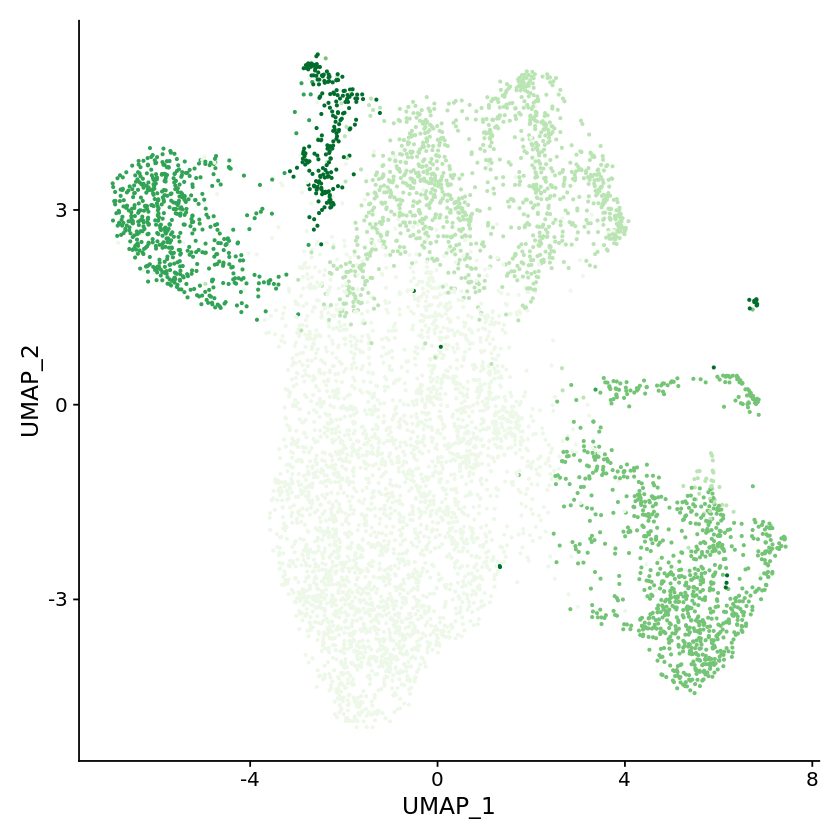

In [49]:
subclust.NOL <- DimPlot(seurat.all.data.sub, reduction = "umap", label = FALSE, pt.size = 0.5, cols = cols.subclusters)+ NoLegend()

subclust.NOL

character(0)

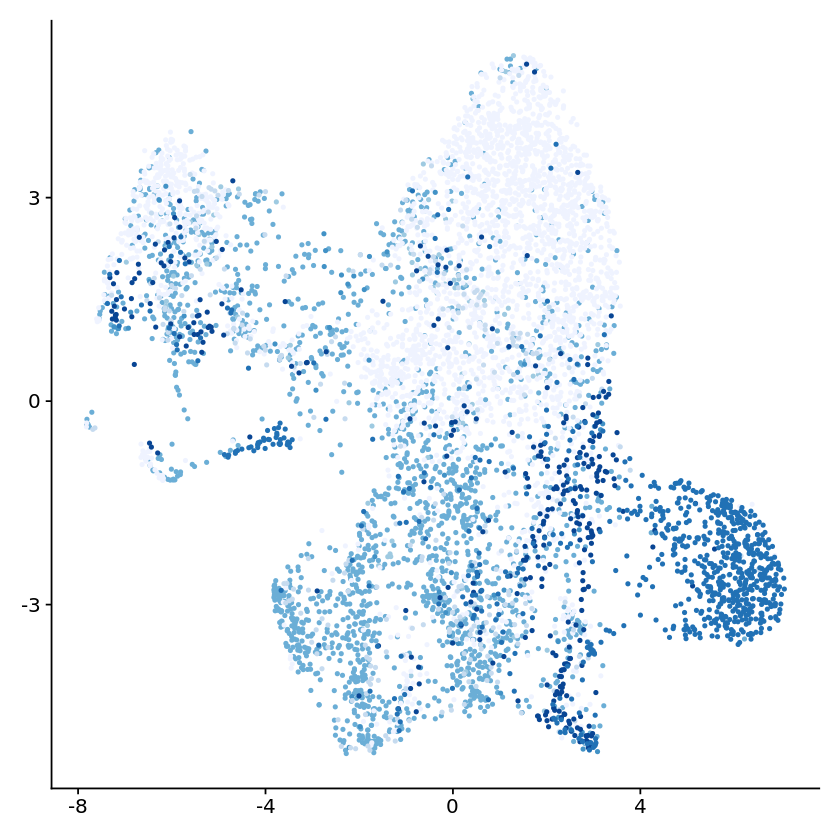

In [12]:
DimPlot(seurat.all.data.sub, reduction = "umap", group.by = "milk_stage_ordered", pt.size = 0.8, cols = cols.milk.stage) + NoLegend() + theme(
  plot.title = element_blank(),
  axis.title.x = element_blank(),
  axis.title.y = element_blank())

ggsave("Milk_stage_UMAP_NOL.pdf", height = 5, width = 5, units = "in", useDingbats = F)
system(paste0("gsutil cp Milk_stage_UMAP_NOL.pdf gs://fc-943d6020-b7d7-4091-b0d4-51cc6cb7617e/Macrophage_Figure/"), intern=TRUE)


character(0)

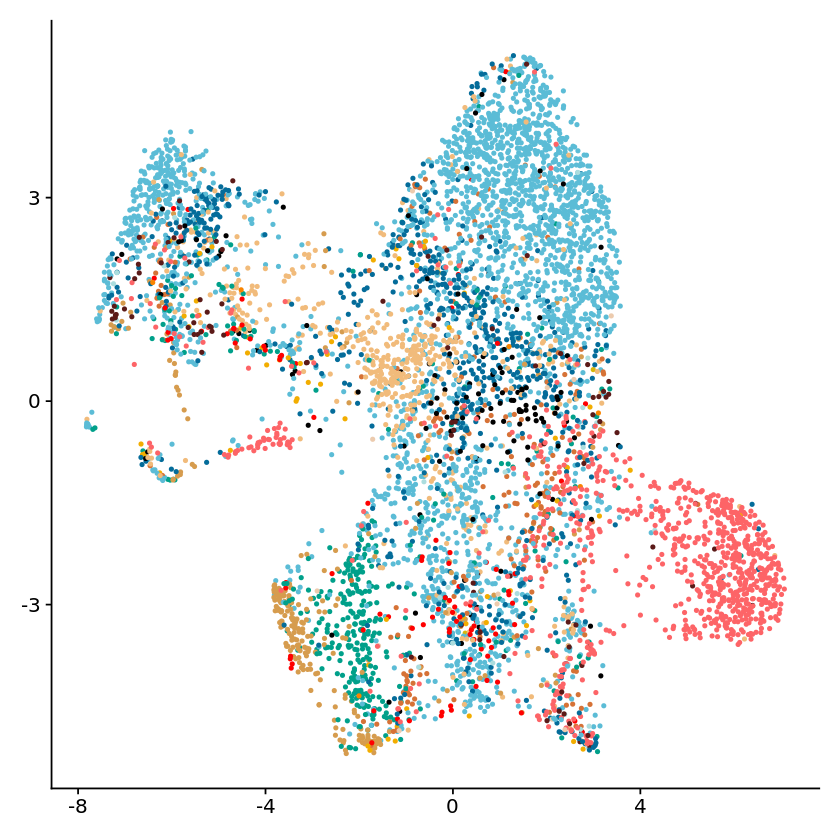

In [18]:
DimPlot(seurat.all.data.sub, reduction = "umap", group.by = "donor", pt.size = 0.8, cols = cols.donor) + NoLegend() + theme(
  plot.title = element_blank(),
  axis.title.x = element_blank(),
  axis.title.y = element_blank())

ggsave("Donor_UMAP_NOL.pdf", height = 5, width = 5, units = "in", useDingbats = F)
system(paste0("gsutil cp Donor_UMAP_NOL.pdf gs://fc-943d6020-b7d7-4091-b0d4-51cc6cb7617e/Macrophage_Figure/"), intern=TRUE)


In [14]:
colnames(seurat.all.data.sub@meta.data)

[1] "orig.ident"                                
 [2] "nCount_RNA"                                
 [3] "nFeature_RNA"                              
 [4] "sample"                                    
 [5] "samplename_seurat_obj"                     
 [6] "include_for_analysis"                      
 [7] "baby_born"                                 
 [8] "date_processed"                            
 [9] "time_post_partum_days"                     
[10] "time_post_partum_weeks"                    
[11] "milk_stage"                                
[12] "donor"                                     
[13] "milk_processing"                           
[14] "infant_sick_YN"                            
[15] "weaning_YN"                                
[16] "mastisis_YN"                               
[17] "breast_soreness_YN"                        
[18] "directly_breastfeeding_YN"                 
[19] "any_formula_YN"                            
[20] "sample_origin_left_right_na_both"          
[21] "donor_reported_favored_breast"             
[22] "sequencing_runs"                           
[23] "mother_medications_YN"                     
[24] "medications_list"                          
[25] "reported_menstruating_YN"                  
[26] "maternal_medical_event_YN"                 
[27] "maternal_medical_event_description"        
[28] "hormonal_birthcontrol_YN"                  
[29] "daycare_YN"                                
[30] "vaccines_reported_YN"                      
[31] "vaccines_list"                             
[32] "solid_foods_YN"                            
[33] "reported_infant_medical_events_YN"         
[34] "reported_infant_medical_events_description"
[35] "health_issues_reported_notes"              
[36] "new_samplename.1"                          
[37] "old.samplename"                            
[38] "sample_volume_mL"                          
[39] "live_cell_count_total_millions"            
[40] "dead_cell_count_total_millions"            
[41] "live_per_mL"                               
[42] "dead_per_mL"                               
[43] "sample_collection_time"                    
[44] "time_arrays_sealed"                        
[45] "time_to_sealing_h_mm"                      
[46] "array_batch"                               
[47] "sample_provided_in"                        
[48] "Bead.Lot"                                  
[49] "Notes"                                     
[50] "Unnamed..46"                               
[51] "Unnamed..47"                               
[52] "per_timepoint_celltypes"                   
[53] "per_timepoint_leiden"                      
[54] "n_genes_by_counts"                         
[55] "log1p_n_genes_by_counts"                   
[56] "total_counts"                              
[57] "log1p_total_counts"                        
[58] "pct_counts_in_top_50_genes"                
[59] "pct_counts_in_top_100_genes"               
[60] "pct_counts_in_top_200_genes"               
[61] "pct_counts_in_top_500_genes"               
[62] "percent_mito"                              
[63] "UMI_to_gene_ratio"                         
[64] "n_UMI_sample_percentile"                   
[65] "n_genes_sample_percentile"                 
[66] "UMI_to_gene_ratio_sample_percentile"       
[67] "doublet_scores"                            
[68] "predicted_doublet"                         
[69] "n_counts"                                  
[70] "milk.stage.ordered"                        
[71] "leiden"                                    
[72] "RNA_snn_res.0.4"                           
[73] "seurat_clusters"                           
[74] "RNA_snn_res.0.2"                           
[75] "RNA_snn_res.0.1"                           
[76] "RNA_snn_res.0.5"                           
[77] "RNA_snn_res.1"                             
[78] "RNA_snn_res.1.5"                           
[79] "RNA_snn_res.2"                             
[80] "initial_cell_IDs"                          
[

character(0)

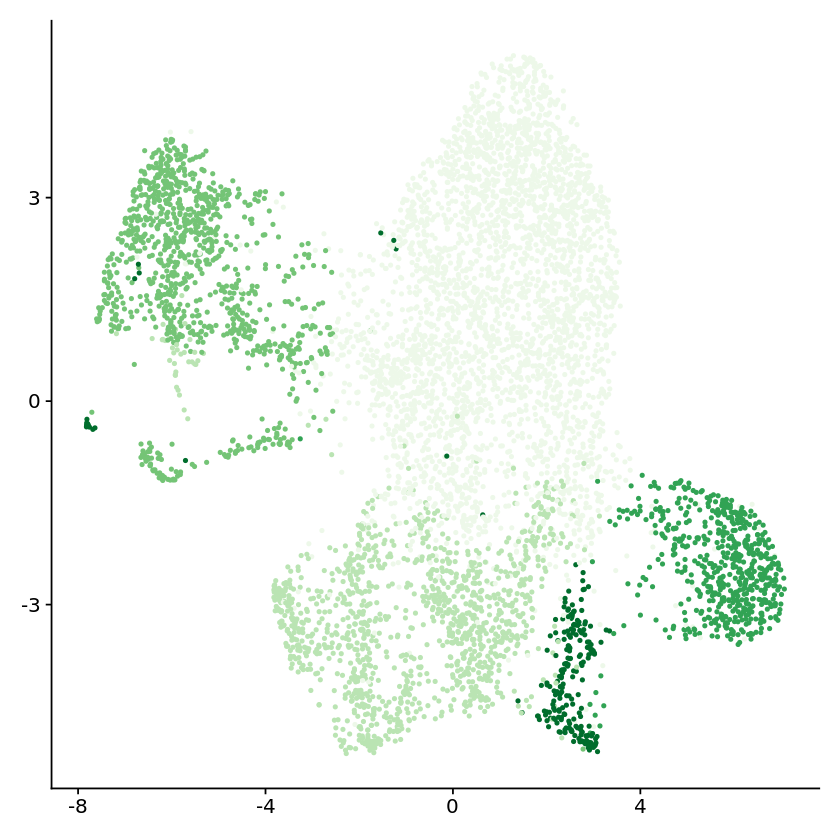

In [19]:
DimPlot(seurat.all.data.sub, reduction = "umap", group.by = "RNA_snn_res.0.2", pt.size = 0.8, cols = cols.subclusters) + NoLegend() + theme(
  plot.title = element_blank(),
  axis.title.x = element_blank(),
  axis.title.y = element_blank())
ggsave("Subcluster_UMAP_NOL.pdf", height = 5, width = 5, units = "in", useDingbats = F)
system(paste0("gsutil cp Subcluster_UMAP_NOL.pdf gs://fc-943d6020-b7d7-4091-b0d4-51cc6cb7617e/Macrophage_Figure/"), intern=TRUE)


In [50]:
Idents(object=seurat.all.data.sub) <- "RNA_snn_res.0.2"
seurat.all.data.markers.sub <- FindAllMarkers(seurat.all.data.sub, test.use = "wilcox", 
                                          only.pos = TRUE, min.pct =0.2, logfc.threshold = 0.5)
#write.table(seurat.all.data.markers.sub,file="seurat.all.markers.wilcox.res02.txt",sep="\t",quote=FALSE,col.names=NA)
#system(paste0("gsutil cp seurat.all.markers.wilcox.res02.txt gs://fc-943d6020-b7d7-4091-b0d4-51cc6cb7617e/Macrophage_Figure/"), intern=TRUE)


Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4



Scale for 'fill' is already present. Adding another scale for 'fill', which
will replace the existing scale.



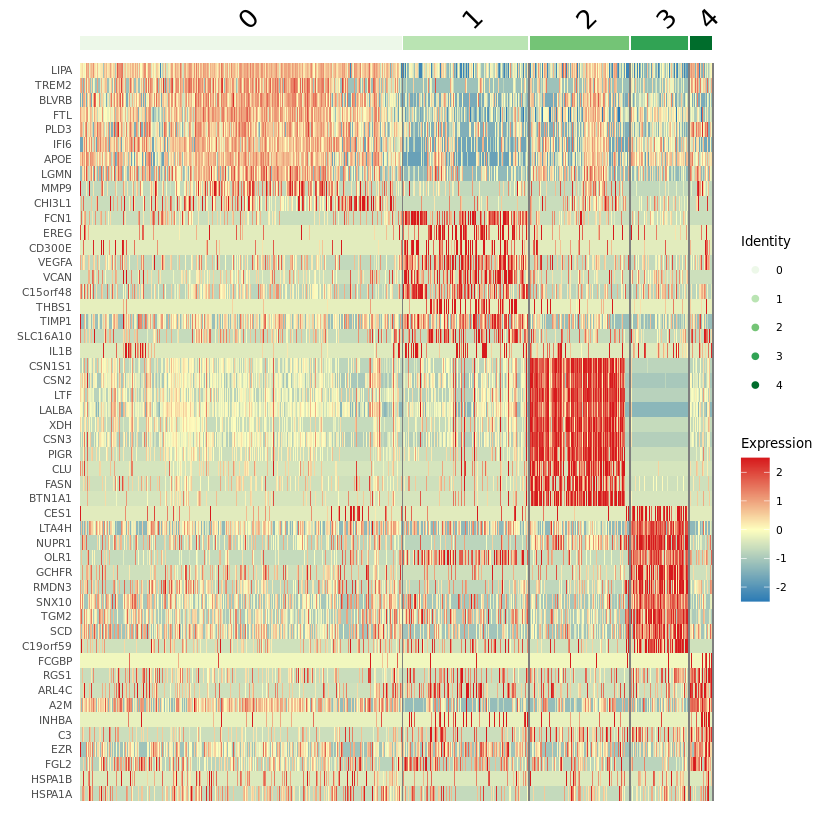

In [51]:
top10.sub <- seurat.all.data.markers.sub %>% group_by(cluster) %>% top_n(n = 10, wt = avg_logFC)
DEmap <- DoHeatmap(seurat.all.data.sub,features=top10.sub$gene, raster = FALSE, group.colors = cols.subclusters) + theme(text = element_text(size = 8)) + scale_fill_gradientn(colors = colorRampPalette(c("#2c7bb6", "#ffffbf", "#d7191c"))(256))
print(DEmap)
#ggsave("Exp_Heatmap_Res02.pdf", useDingbats = F)
#system(paste0("gsutil cp Exp_Heatmap_Res02.pdf gs://fc-943d6020-b7d7-4091-b0d4-51cc6cb7617e/Macrophage_Figure/"), intern=TRUE)




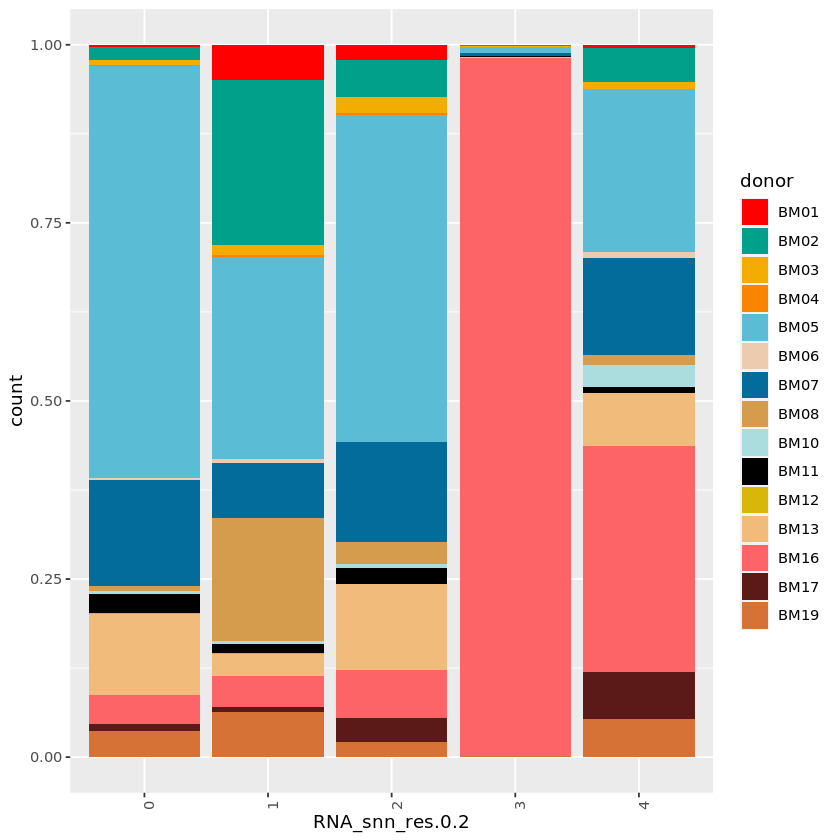

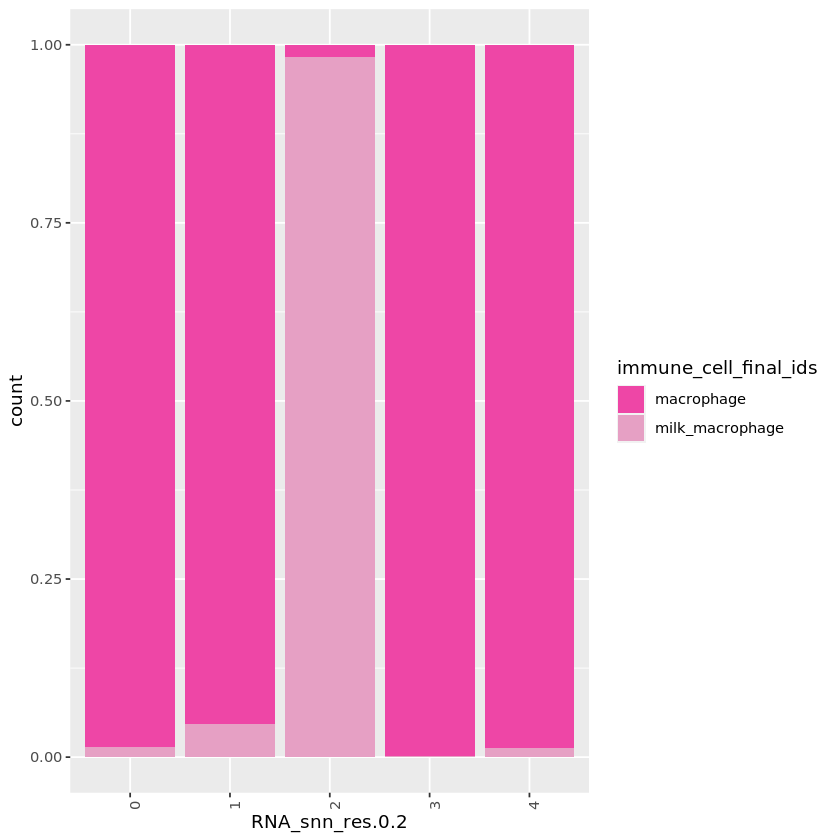

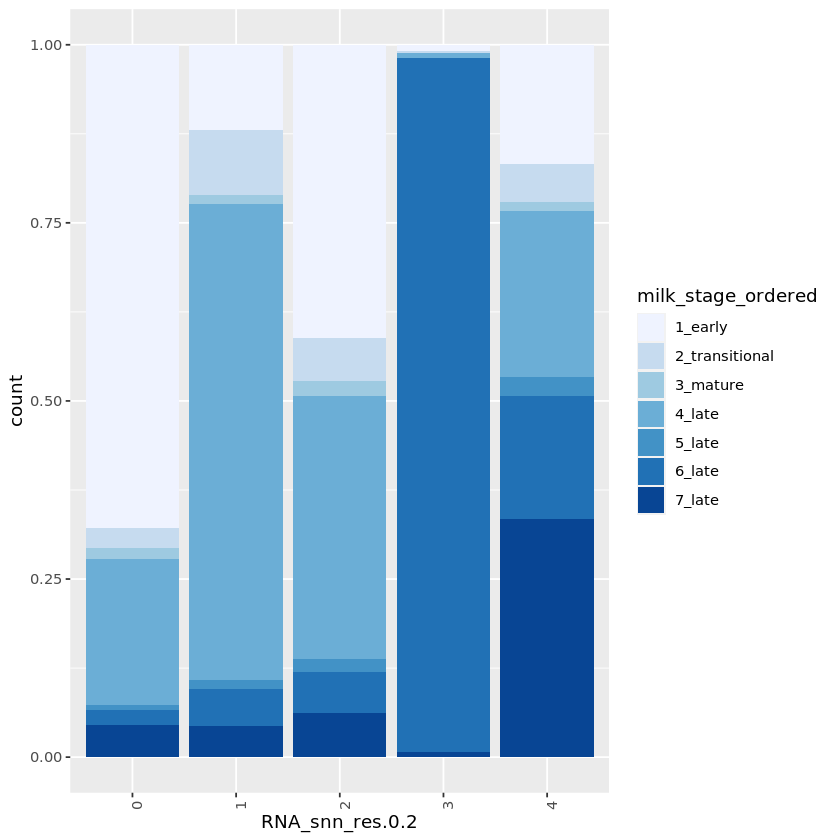

In [52]:
# stacked barplots
ggplot(seurat.all.data.sub@meta.data, aes(x=RNA_snn_res.0.2, fill=donor)) + geom_bar(position = "fill") + theme(axis.text.x = element_text(angle = 90, hjust = 1)) + scale_fill_manual(values=cols.donor)

ggplot(seurat.all.data.sub@meta.data, aes(x=RNA_snn_res.0.2, fill=immune_cell_final_ids)) + geom_bar(position = "fill") + theme(axis.text.x = element_text(angle = 90, hjust = 1)) + scale_fill_manual(values=cols.newcellIDs)

ggplot(seurat.all.data.sub@meta.data, aes(x=RNA_snn_res.0.2, fill=milk_stage_ordered)) + geom_bar(position = "fill") + theme(axis.text.x = element_text(angle = 90, hjust = 1)) + scale_fill_manual(values=cols.milk.stage)


In [53]:
colnames(seurat.all.data.sub@meta.data)

[1] "orig.ident"                                
 [2] "nCount_RNA"                                
 [3] "nFeature_RNA"                              
 [4] "sample"                                    
 [5] "samplename_seurat_obj"                     
 [6] "include_for_analysis"                      
 [7] "baby_born"                                 
 [8] "date_processed"                            
 [9] "time_post_partum_days"                     
[10] "time_post_partum_weeks"                    
[11] "milk_stage"                                
[12] "donor"                                     
[13] "milk_processing"                           
[14] "infant_sick_YN"                            
[15] "weaning_YN"                                
[16] "mastisis_YN"                               
[17] "breast_soreness_YN"                        
[18] "directly_breastfeeding_YN"                 
[19] "any_formula_YN"                            
[20] "sample_origin_left_right_na_both"          
[21] "donor_reported_favored_breast"             
[22] "sequencing_runs"                           
[23] "mother_medications_YN"                     
[24] "medications_list"                          
[25] "reported_menstruating_YN"                  
[26] "maternal_medical_event_YN"                 
[27] "maternal_medical_event_description"        
[28] "hormonal_birthcontrol_YN"                  
[29] "daycare_YN"                                
[30] "vaccines_reported_YN"                      
[31] "vaccines_list"                             
[32] "solid_foods_YN"                            
[33] "reported_infant_medical_events_YN"         
[34] "reported_infant_medical_events_description"
[35] "health_issues_reported_notes"              
[36] "new_samplename.1"                          
[37] "old.samplename"                            
[38] "sample_volume_mL"                          
[39] "live_cell_count_total_millions"            
[40] "dead_cell_count_total_millions"            
[41] "live_per_mL"                               
[42] "dead_per_mL"                               
[43] "sample_collection_time"                    
[44] "time_arrays_sealed"                        
[45] "time_to_sealing_h_mm"                      
[46] "array_batch"                               
[47] "sample_provided_in"                        
[48] "Bead.Lot"                                  
[49] "Notes"                                     
[50] "Unnamed..46"                               
[51] "Unnamed..47"                               
[52] "per_timepoint_celltypes"                   
[53] "per_timepoint_leiden"                      
[54] "n_genes_by_counts"                         
[55] "log1p_n_genes_by_counts"                   
[56] "total_counts"                              
[57] "log1p_total_counts"                        
[58] "pct_counts_in_top_50_genes"                
[59] "pct_counts_in_top_100_genes"               
[60] "pct_counts_in_top_200_genes"               
[61] "pct_counts_in_top_500_genes"               
[62] "percent_mito"                              
[63] "UMI_to_gene_ratio"                         
[64] "n_UMI_sample_percentile"                   
[65] "n_genes_sample_percentile"                 
[66] "UMI_to_gene_ratio_sample_percentile"       
[67] "doublet_scores"                            
[68] "predicted_doublet"                         
[69] "n_counts"                                  
[70] "milk.stage.ordered"                        
[71] "leiden"                                    
[72] "RNA_snn_res.0.4"                           
[73] "seurat_clusters"                           
[74] "RNA_snn_res.0.2"                           
[75] "RNA_snn_res.0.1"                           
[76] "RNA_snn_res.0.5"                           
[77] "RNA_snn_res.1"                             
[78] "RNA_snn_res.1.5"                           
[79] "RNA_snn_res.2"                             
[80] "initial_cell_IDs"                          
[

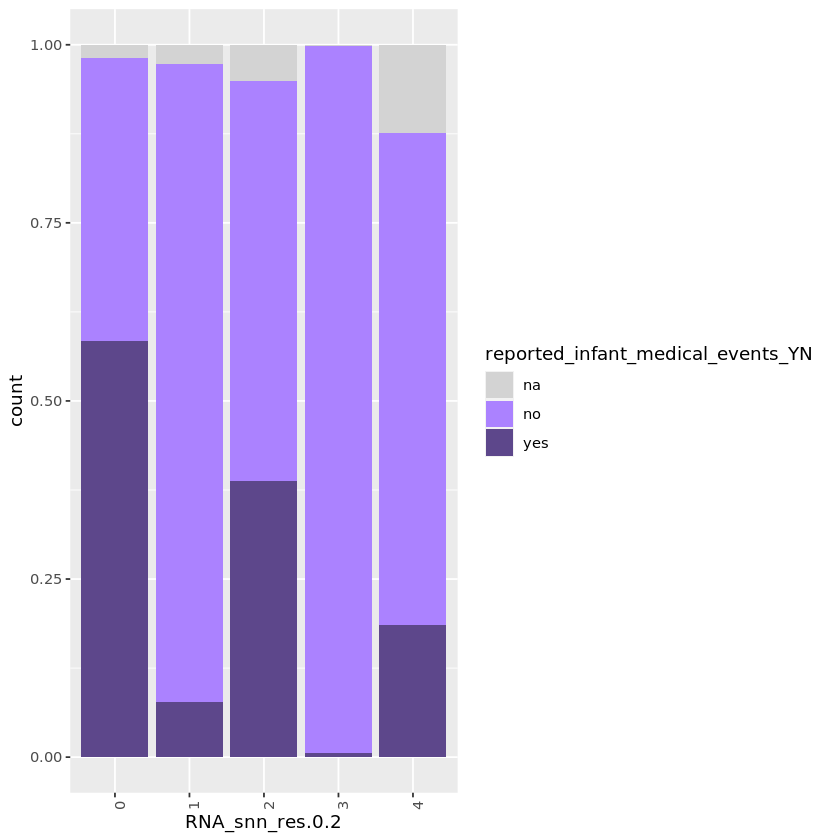

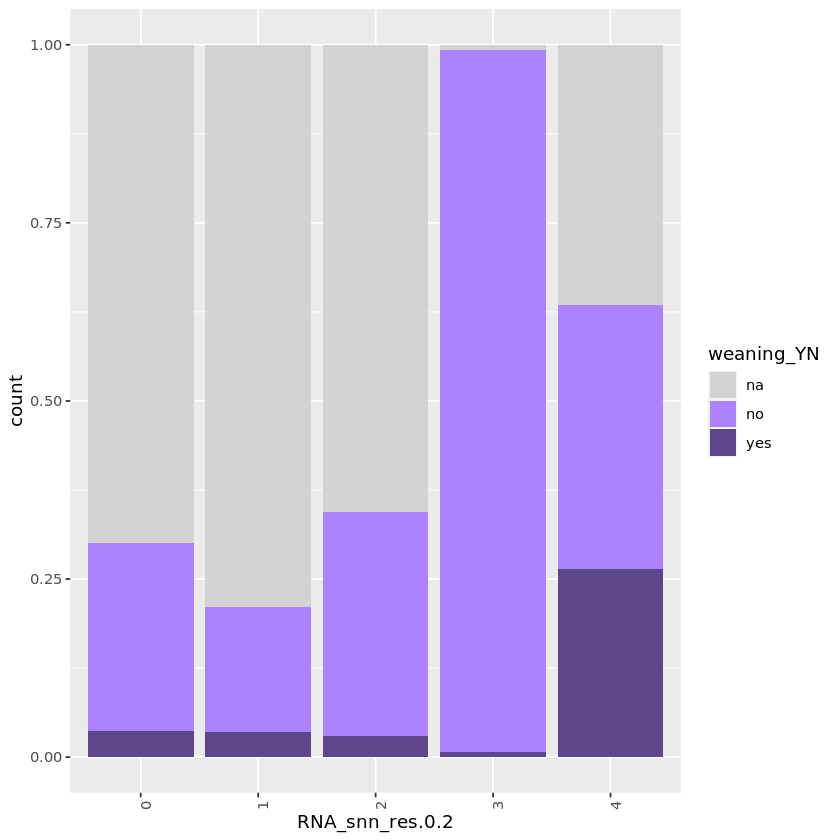

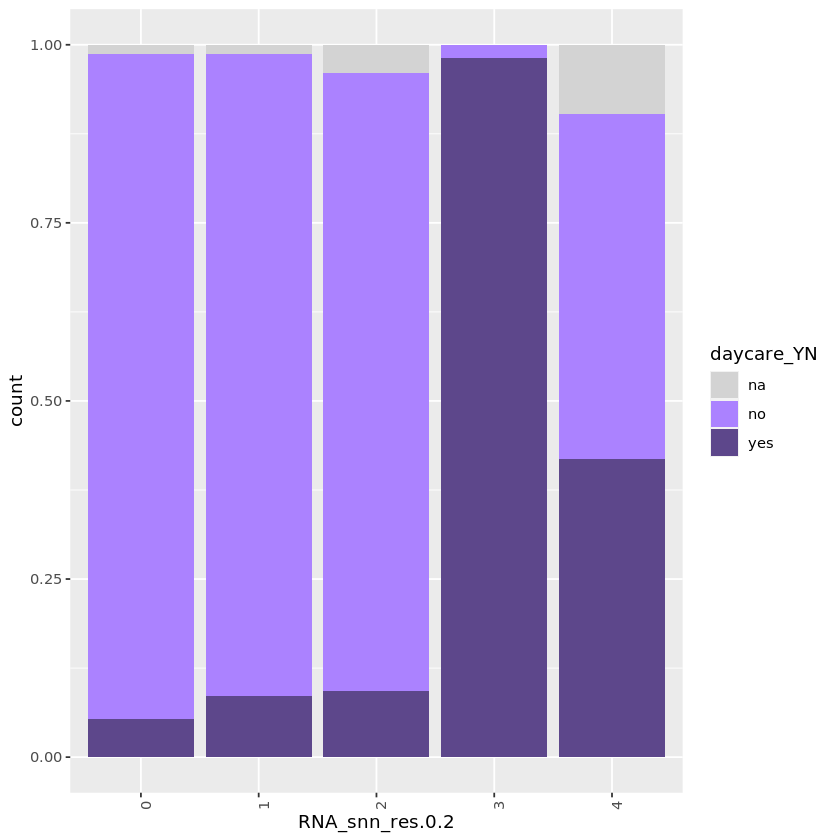

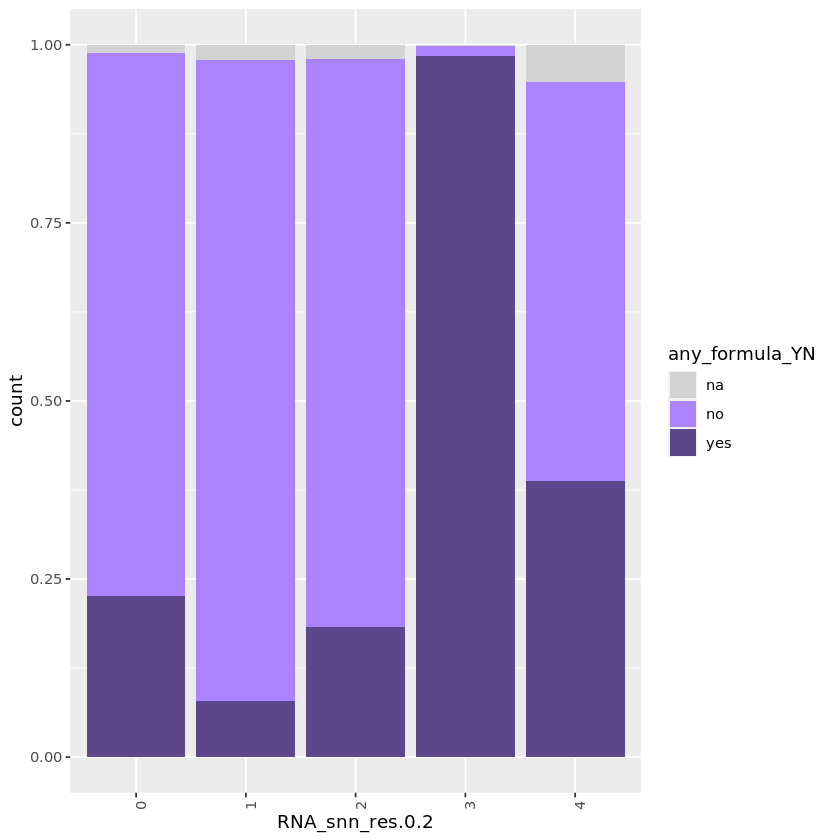

In [21]:
medgg <- ggplot(seurat.all.data.sub@meta.data, aes(x=RNA_snn_res.0.2, fill=reported_infant_medical_events_YN)) + geom_bar(position = "fill") + theme(axis.text.x = element_text(angle = 90, hjust = 1)) + scale_fill_manual(values=na.no.yes.cols) 
weangg <- ggplot(seurat.all.data.sub@meta.data, aes(x=RNA_snn_res.0.2, fill=weaning_YN)) + geom_bar(position = "fill") + theme(axis.text.x = element_text(angle = 90, hjust = 1)) + scale_fill_manual(values=na.no.yes.cols) 
daycaregg<- ggplot(seurat.all.data.sub@meta.data, aes(x=RNA_snn_res.0.2, fill=daycare_YN)) + geom_bar(position = "fill") + theme(axis.text.x = element_text(angle = 90, hjust = 1)) + scale_fill_manual(values=na.no.yes.cols) 
formulagg <- ggplot(seurat.all.data.sub@meta.data, aes(x=RNA_snn_res.0.2, fill=any_formula_YN)) + geom_bar(position = "fill") + theme(axis.text.x = element_text(angle = 90, hjust = 1)) + scale_fill_manual(values=na.no.yes.cols) 

print(medgg)
print(weangg)
print(daycaregg)
print(formulagg)



In [55]:
# export proportion of cells for each sample
seurat.all.factors.sub <- seurat.all.data.sub@meta.data$donor
plate.table.sub = table(seurat.all.factors.sub, as.vector(seurat.all.data.sub@meta.data$RNA_snn_res.0.2))
head(plate.table.sub)

write.table(plate.table.sub,file="cell_frequencies_by_donor.txt",sep="\t",quote=FALSE,col.names=NA)
system(paste0("gsutil cp cell_frequencies_by_donor.txt gs://fc-943d6020-b7d7-4091-b0d4-51cc6cb7617e/Macrophage_Figure/"), intern=TRUE)



                      
seurat.all.factors.sub    0    1    2    3    4
                  BM01   11   63   22    0    1
                  BM02   61  294   52    1   11
                  BM03   21   18   23    1    2
                  BM04    4    2    2    0    0
                  BM05 1890  361  463    5   52
                  BM06    5    6    0    0    2

character(0)

# Module scoring on Dawson gene sets and M1 v M2 signatures

In [56]:
gene.sets.lactation <- read.csv(pipe('gsutil cat gs://fc-a6329ed4-8283-48d4-90c3-d7175f18a168/Milk/20200804_MonocytesAnalysis/DawsonGeneSets_HUGOChecked.csv'))


In [57]:
UP_VirginvPregnancy <- list(gene.sets.lactation$UP_VirginvPregnancy)
seurat.all.data.sub <- AddModuleScore(object = seurat.all.data.sub, features = UP_VirginvPregnancy, name = "UP_VirginvPregnancy_2", seed.use = 1988)

DOWN_VirginvPregnancy <- list(gene.sets.lactation$DOWN_VirginvPregnancy)
seurat.all.data.sub <- AddModuleScore(object = seurat.all.data.sub, features = DOWN_VirginvPregnancy, name = "DOWN_VirginvPregnancy_2", seed.use = 1988)

UP_PregnancyvLactation <- list(gene.sets.lactation$UP_PregnancyvLactation)
seurat.all.data.sub <- AddModuleScore(object = seurat.all.data.sub, features = UP_PregnancyvLactation, name = "UP_PregnancyvLactation_2", seed.use = 1988)


DOWN_PregnancyvLactation <- list(gene.sets.lactation$DOWN_PregnancyvLactation)
seurat.all.data.sub <- AddModuleScore(object = seurat.all.data.sub, features = DOWN_PregnancyvLactation, name = "DOWN_PregnancyvLactation_2", seed.use = 1988)

DOWN_VirginvWeaning <- list(gene.sets.lactation$DOWN_VirginvWeaning)
seurat.all.data.sub <- AddModuleScore(object = seurat.all.data.sub, features = DOWN_VirginvWeaning, name = "DOWN_VirginvWeaning_2", seed.use = 1988)


Warning message:
“The following features are not present in the object: FAM25C, MCUB, , not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: GLYCAM1, CFB, CKS1B, ADGRL2, NIM1K, SELENOH, PCLAF, ACOD1, NEPRO, PRELID3B, , not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: SELENOH, KIZ, DDIAS, AKR1B10, MCEMP1, B4GAT1, CKS1B, TWNK, RSRP1, SELENOP, GLYCAM1, NIM1K, , not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: PF4, RAB7B, CARD19, MMP13, NOCT, GNAT3, TM4SF19, COQ8B, PRAG1, SELENOM, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: , not searching for symbol synonyms”


In [58]:
gene.sets.Chung <- read.csv(pipe('gsutil cat gs://fc-a6329ed4-8283-48d4-90c3-d7175f18a168/Milk/20200804_MonocytesAnalysis/Chung_Mphages.csv'))

M1_UP <- list(gene.sets.Chung$M1_UP)
M2_UP <- list(gene.sets.Chung$M2_UP)
seurat.all.data.sub <- AddModuleScore(object = seurat.all.data.sub, features = M1_UP, name = "M1_UP_2", seed.use = 1988)
seurat.all.data.sub <- AddModuleScore(object = seurat.all.data.sub, features = M2_UP, name = "M2_UP_2", seed.use = 1988)


Warning message:
“The following features are not present in the object: CCL15, TRAIL, PBEF1, ECGF1, HSXIAPAF1, SLC21A15, INDO, PSMA2, CSPG2, IFGBP4, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: GPR86, P2RY5, DCL-1, DECTIN1, DCSIGN, CLECSF13, IFG1, SLC21A9, , not searching for symbol synonyms”


In [59]:
colnames(seurat.all.data.sub@meta.data)

[1] "orig.ident"                                
  [2] "nCount_RNA"                                
  [3] "nFeature_RNA"                              
  [4] "sample"                                    
  [5] "samplename_seurat_obj"                     
  [6] "include_for_analysis"                      
  [7] "baby_born"                                 
  [8] "date_processed"                            
  [9] "time_post_partum_days"                     
 [10] "time_post_partum_weeks"                    
 [11] "milk_stage"                                
 [12] "donor"                                     
 [13] "milk_processing"                           
 [14] "infant_sick_YN"                            
 [15] "weaning_YN"                                
 [16] "mastisis_YN"                               
 [17] "breast_soreness_YN"                        
 [18] "directly_breastfeeding_YN"                 
 [19] "any_formula_YN"                            
 [20] "sample_origin_left_right_na_both"          
 [21] "donor_reported_favored_breast"             
 [22] "sequencing_runs"                           
 [23] "mother_medications_YN"                     
 [24] "medications_list"                          
 [25] "reported_menstruating_YN"                  
 [26] "maternal_medical_event_YN"                 
 [27] "maternal_medical_event_description"        
 [28] "hormonal_birthcontrol_YN"                  
 [29] "daycare_YN"                                
 [30] "vaccines_reported_YN"                      
 [31] "vaccines_list"                             
 [32] "solid_foods_YN"                            
 [33] "reported_infant_medical_events_YN"         
 [34] "reported_infant_medical_events_description"
 [35] "health_issues_reported_notes"              
 [36] "new_samplename.1"                          
 [37] "old.samplename"                            
 [38] "sample_volume_mL"                          
 [39] "live_cell_count_total_millions"            
 [40] "dead_cell_count_total_millions"            
 [41] "live_per_mL"                               
 [42] "dead_per_mL"                               
 [43] "sample_collection_time"                    
 [44] "time_arrays_sealed"                        
 [45] "time_to_sealing_h_mm"                      
 [46] "array_batch"                               
 [47] "sample_provided_in"                        
 [48] "Bead.Lot"                                  
 [49] "Notes"                                     
 [50] "Unnamed..46"                               
 [51] "Unnamed..47"                               
 [52] "per_timepoint_celltypes"                   
 [53] "per_timepoint_leiden"                      
 [54] "n_genes_by_counts"                         
 [55] "log1p_n_genes_by_counts"                   
 [56] "total_counts"                              
 [57] "log1p_total_counts"                        
 [58] "pct_counts_in_top_50_genes"                
 [59] "pct_counts_in_top_100_genes"               
 [60] "pct_counts_in_top_200_genes"               
 [61] "pct_counts_in_top_500_genes"               
 [62] "percent_mito"                              
 [63] "UMI_to_gene_ratio"                         
 [64] "n_UMI_sample_percentile"                   
 [65] "n_genes_sample_percentile"                 
 [66] "UMI_to_gene_ratio_sample_percentile"       
 [67] "doublet_scores"                            
 [68] "predicted_doublet"                         
 [69] "n_counts"                                  
 [70] "milk.stage.ordered"                        
 [71] "leiden"                                    
 [72] "RNA_snn_res.0.4"                           
 [73] "seurat_clusters"                           
 [74] "RNA_snn_res.0.2"                           
 [75] "RNA_snn_res.0.1"                           
 [76] "RNA_snn_res.0.5"                           
 [77] "RNA_snn_res.1"                             
 [78] "RNA_snn_res.1.5"                           
 [79] "RNA_snn_res.2"   

In [60]:
dim(seurat.all.data.sub@meta.data)

[1] 6349  106

In [61]:
meta.data.modulescores <- seurat.all.data.sub@meta.data

In [ ]:
# t.test, wilcox.test, anova, kruskal.test

In [62]:
# add boxplot with white fill color
UP_VirginvPregnancy_21 <- ggviolin(meta.data.modulescores, x = "RNA_snn_res.0.2", y = "UP_VirginvPregnancy_21", fill = "RNA_snn_res.0.2",
         palette = cols.subclusters,
         add = "boxplot", add.params = list(fill = "white"))+
  stat_compare_means(method = "anova", label.y = 1) + 
  stat_compare_means(label = "p.signif", method = "wilcox.test",
                     ref.group = ".all.")

DOWN_VirginvPregnancy_21 <- ggviolin(meta.data.modulescores, x = "RNA_snn_res.0.2", y = "DOWN_VirginvPregnancy_21", fill = "RNA_snn_res.0.2",
         palette = cols.subclusters,
         add = "boxplot", add.params = list(fill = "white"))+
  stat_compare_means(method = "anova", label.y = 1) + 
  stat_compare_means(label = "p.signif", method = "wilcox.test",
                     ref.group = ".all.")

UP_PregnancyvLactation_21 <- ggviolin(meta.data.modulescores, x = "RNA_snn_res.0.2", y = "UP_PregnancyvLactation_21", fill = "RNA_snn_res.0.2",
         palette = cols.subclusters,
         add = "boxplot", add.params = list(fill = "white"))+
  stat_compare_means(method = "anova", label.y = 1) + 
  stat_compare_means(label = "p.signif", method = "wilcox.test",
                     ref.group = ".all.")

DOWN_PregnancyvLactation_21 <- ggviolin(meta.data.modulescores, x = "RNA_snn_res.0.2", y = "DOWN_PregnancyvLactation_21", fill = "RNA_snn_res.0.2",
         palette = cols.subclusters,
         add = "boxplot", add.params = list(fill = "white"))+
  stat_compare_means(method = "anova", label.y = 1) + 
  stat_compare_means(label = "p.signif", method = "wilcox.test",
                     ref.group = ".all.")

DOWN_VirginvWeaning_21 <- ggviolin(meta.data.modulescores, x = "RNA_snn_res.0.2", y = "DOWN_VirginvWeaning_21", fill = "RNA_snn_res.0.2",
         palette = cols.subclusters,
         add = "boxplot", add.params = list(fill = "white"))+
  stat_compare_means(method = "anova", label.y = 1) + 
  stat_compare_means(label = "p.signif", method = "wilcox.test",
                     ref.group = ".all.")


character(0)

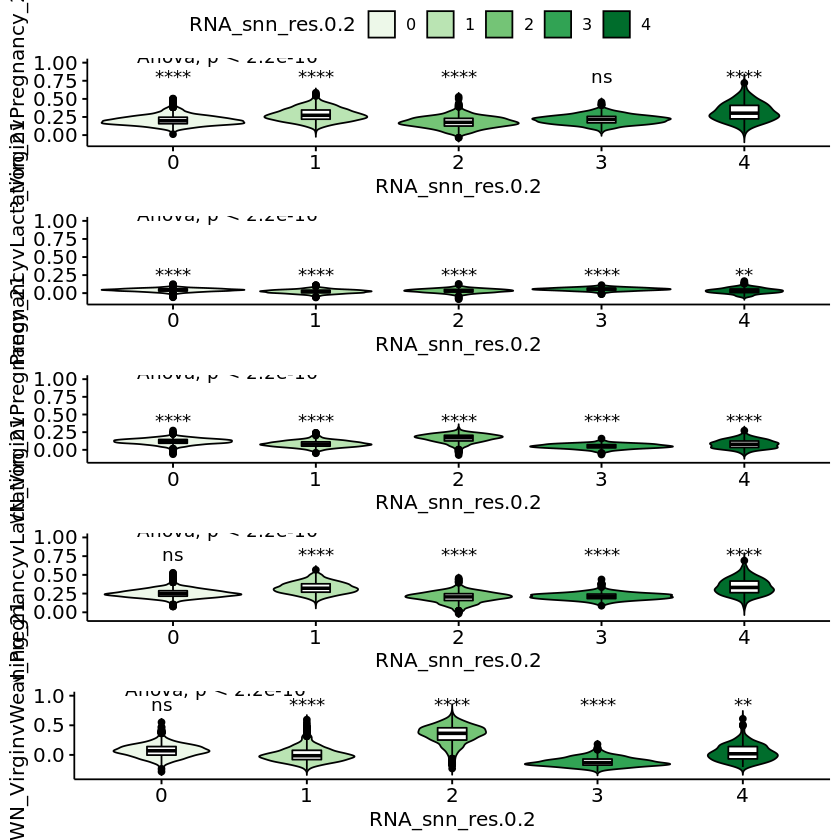

In [63]:
ggarrange(UP_VirginvPregnancy_21, UP_PregnancyvLactation_21, DOWN_VirginvPregnancy_21, 
          DOWN_PregnancyvLactation_21, DOWN_VirginvWeaning_21, ncol = 1, common.legend = TRUE)
ggsave("Dawson_modules.pdf", height = 12, width = 4, units = "in", useDingbats = F)
system(paste0("gsutil cp Dawson_modules.pdf gs://fc-943d6020-b7d7-4091-b0d4-51cc6cb7617e/Macrophage_Figure/"), intern=TRUE)


In [64]:
meta.data.modulescores$clusters <- meta.data.modulescores$RNA_snn_res.0.2
head(meta.data.modulescores)

orig.ident     nCount_RNA nFeature_RNA
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA ImmuneDoublets 7689       2529        
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG ImmuneDoublets 3404       1435        
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG ImmuneDoublets 3899       1961        
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG ImmuneDoublets 8852       2617        
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG ImmuneDoublets 2981       1588        
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG ImmuneDoublets 2800       1499        
                                        sample        samplename_seurat_obj
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA BM02_6wkpp_r1 nan                  
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG BM02_6wkpp_r1 nan                  
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG BM02_6wkpp_r1 nan                  
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG BM02_6wkpp_r1 nan                  
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG BM02_6wkpp_r1 nan                  
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG BM02_6wkpp_r1 nan                  
                                        include_for_analysis baby_born
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA 1                    3/15/19  
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG 1                    3/15/19  
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG 1                    3/15/19  
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG 1                    3/15/19  
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG 1                    3/15/19  
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG 1                    3/15/19  
                                        date_processed time_post_partum_days
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA 4/24/19        40                   
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG 4/24/19        40                   
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG 4/24/19        40                   
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG 4/24/19        40                   
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG 4/24/19        40                   
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG 4/24/19        40                   
                                        time_post_partum_weeks ⋯
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA 5.71                   ⋯
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG 5.71                   ⋯
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG 5.71                   ⋯
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG 5.71                   ⋯
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG 5.71                   ⋯
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG 5.71                   ⋯
                                        reported_menstruating_YN_fixed
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA no                            
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG no                            
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG no                            
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG no                            
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG no                            
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG no                            
                                        hormonal_birthcontrol_YN_fixed
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA no                            
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG no                            
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG no                            
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG no                            
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG no                            
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG no                            
                                        UP_VirginvPregnancy_21
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA 0.2750632             
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG 0.2636831             
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG 0.4045345             
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG 0.3471729             
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG 0.3790793             
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG 0.2836456             
                             

In [65]:
# Rearrange for pairwise plots of M2 v M1
meta.data.modulescores.M1 <- meta.data.modulescores[,105:107]
meta.data.modulescores.M1$M2_UP_21 <- NULL
meta.data.modulescores.M1$ModuleName <- c("M1")
colnames(meta.data.modulescores.M1) <- c("score","clusters", "module")
head(meta.data.modulescores.M1)


meta.data.modulescores.M2 <- meta.data.modulescores[,105:107]
meta.data.modulescores.M2$M1_UP_21 <- NULL
meta.data.modulescores.M2$ModuleName <- c("M2")
colnames(meta.data.modulescores.M2) <- c("score","clusters", "module")
head(meta.data.modulescores.M2)

score      clusters module
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA 0.23782885 1        M1    
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG 0.37225549 1        M1    
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG 0.05348597 1        M1    
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG 0.00893899 1        M1    
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG 0.15450320 1        M1    
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG 0.08855926 1        M1

score       clusters module
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA  0.09402904 1        M2    
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG  0.27850643 1        M2    
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG -0.23026939 1        M2    
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG -0.21733850 1        M2    
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG  0.27146571 1        M2    
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG  0.15307313 1        M2

In [66]:
macrophage.module.scores <- rbind(meta.data.modulescores.M1,meta.data.modulescores.M2)
head(macrophage.module.scores)
tail(macrophage.module.scores)

score      clusters module
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA 0.23782885 1        M1    
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG 0.37225549 1        M1    
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG 0.05348597 1        M1    
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG 0.00893899 1        M1    
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG 0.15450320 1        M1    
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG 0.08855926 1        M1

score       clusters module
immu_doublet_Bfresh_CTATGGGTATTT1  0.22871699 3        M2    
immu_doublet_Bfresh_CGGTGATCTTAG1 -0.14735449 1        M2    
immu_doublet_Bfresh_AAAGGTTCCTCG1 -0.02049417 3        M2    
immu_doublet_Bfresh_AGTAAAACTCTC1 -0.05031486 3        M2    
immu_doublet_Bfresh_TAGTTTTGATCG1  0.01493796 3        M2    
immu_doublet_Bfresh_CATGATACTTTC1 -0.06550074 3        M2

In [67]:
dim(macrophage.module.scores)

[1] 12698     3

character(0)

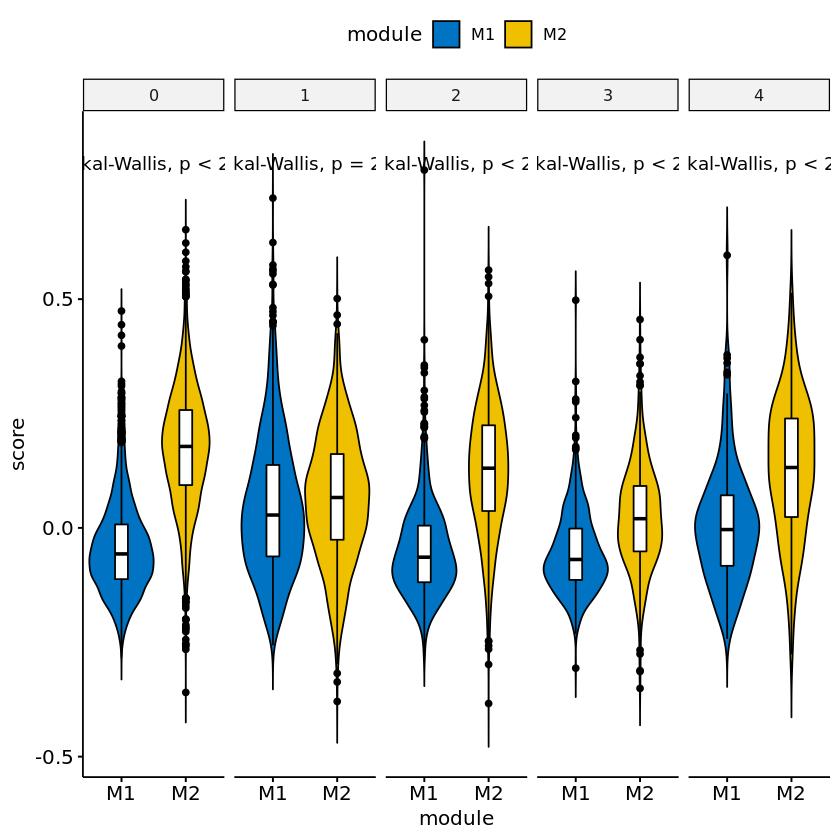

In [68]:
p <- ggviolin(macrophage.module.scores, x = "module", y = "score", 
         fill = "module", palette = "jco",
         add = "boxplot", add.params = list(fill = "white")) +
         stat_compare_means(label.x = 0.5, method = "kruskal.test")

facet(p, facet.by = "clusters", nrow = 1, ncol = 5)
ggsave("M1M2_modules.pdf", height = 4, width = 8, units = "in", useDingbats = F)
system(paste0("gsutil cp M1M2_modules.pdf gs://fc-943d6020-b7d7-4091-b0d4-51cc6cb7617e/Macrophage_Figure/"), intern=TRUE)


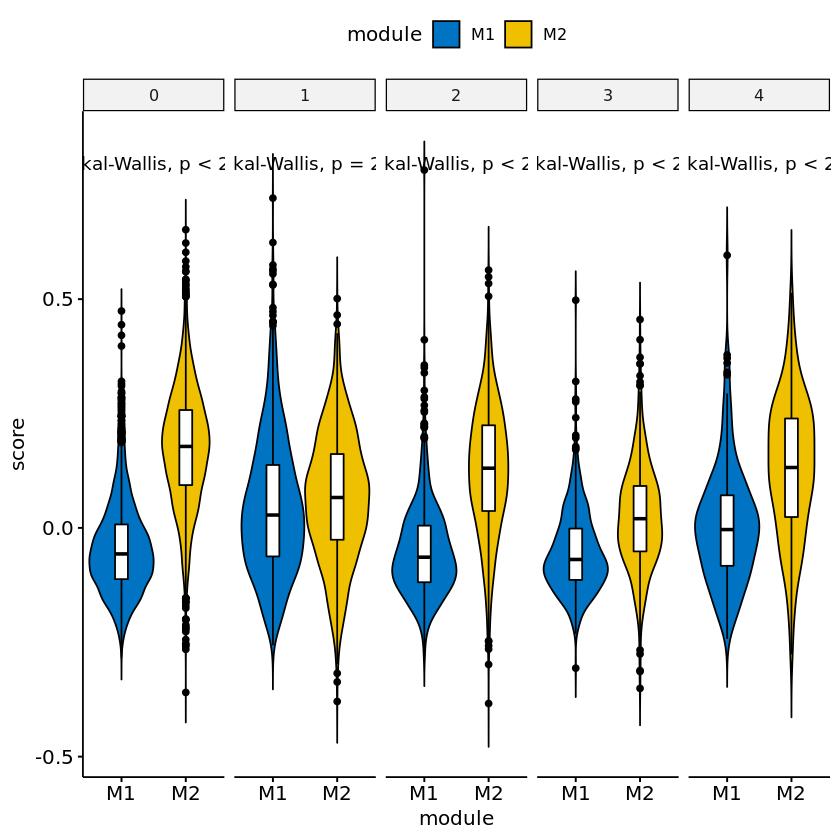

In [69]:
M2M1Scores <- facet(p, facet.by = "clusters", nrow = 1, ncol = 5)
M2M1Scores

# Dotplots of key macrophage genes

Warning message in FetchData(object = object, vars = features, cells = cells):
“The following requested variables were not found: FCGR2C, ADGRB1, ITGB3, NRLH2”


character(0)

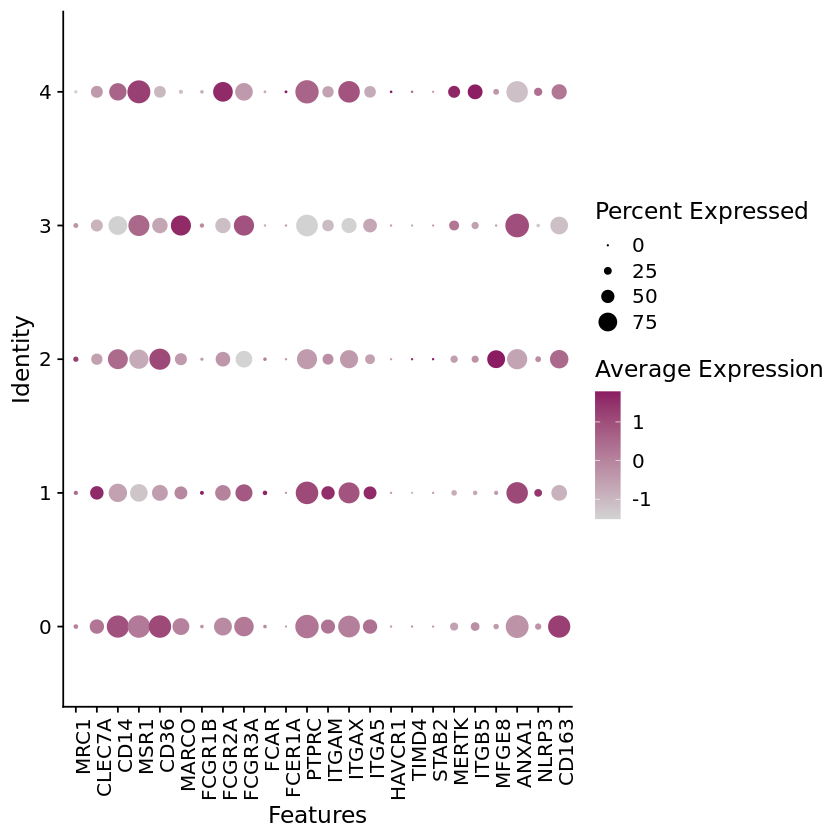

In [70]:
Idents(object=seurat.all.data.sub) <- "RNA_snn_res.0.2"
mac_dot <- DotPlot(seurat.all.data.sub, features = c("MRC1","CLEC7A","CD14","MSR1",
"CD36","MARCO","FCGR1B","FCGR2A","FCGR2C","FCGR3A",
"FCAR","FCER1A","PTPRC","ITGAM","ITGAX","ITGA5","HAVCR1","TIMD4",
"ADGRB1","STAB2","MERTK","ITGB3","ITGB5","MFGE8","ANXA1","NLRP3","NRLH2","CD163"), cols = c("lightgrey", "maroon4")) + theme(axis.text.x = element_text(angle = 90, hjust = 1))

print(mac_dot)
ggsave("MacrophageDotPlots.pdf", height = 4, width = 8, units = "in", useDingbats = F)
system(paste0("gsutil cp MacrophageDotPlots.pdf gs://fc-943d6020-b7d7-4091-b0d4-51cc6cb7617e/Macrophage_Figure/"), intern=TRUE)


# PROGENy on macrophage subclusters

In [71]:
## Full guide for implementation from: https://github.com/saezlab/progeny 
library(progeny)
library(tidyr)
library(readr)
library(tibble)
library(pheatmap)


Attaching package: ‘tidyr’


The following object is masked from ‘package:reshape2’:

    smiths




In [72]:
CellsClusters <- seurat.all.data.sub@meta.data[,73:74]
CellsClusters$seurat_clusters <- NULL
CellsClusters$Cell <- rownames(CellsClusters)
colnames(CellsClusters) <- c("Cluster", "Cell")
head(CellsClusters)


Cluster
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA 1      
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG 1      
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG 1      
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG 1      
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG 1      
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG 1      
                                        Cell                                   
immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA
immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG
immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG
immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG
immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG
immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG

In [73]:
seurat.all.data.sub <- progeny(seurat.all.data.sub, scale=FALSE, organism="Human", top=500, perm=1,return_assay = TRUE)
seurat.all.data.sub <- Seurat::ScaleData(seurat.all.data.sub, assay = "progeny")

Centering and scaling data matrix



In [74]:
head(as.data.frame(t(GetAssayData(seurat.all.data.sub, slot = "scale.data", 
        assay = "progeny")))%>%
    rownames_to_column("Cell")%>%
    gather(Pathway, Activity, -Cell))

Cell                                    Pathway  Activity    
1 immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA Androgen  0.003772252
2 immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG Androgen -0.177338102
3 immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG Androgen -0.839783523
4 immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG Androgen  0.423825788
5 immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG Androgen -0.957066526
6 immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG Androgen -1.657886923

In [75]:
progeny_scores_df_3 <- 
    as.data.frame(t(GetAssayData(seurat.all.data.sub, slot = "scale.data", 
        assay = "progeny"))) %>%
    rownames_to_column("Cell") %>%
    gather(Pathway, Activity, -Cell)
progeny_scores_df <- inner_join(progeny_scores_df_3, CellsClusters)


Joining, by = "Cell"



In [76]:
head(progeny_scores_df)


Cell                                    Pathway  Activity     Cluster
1 immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA Androgen  0.003772252 1      
2 immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG Androgen -0.177338102 1      
3 immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG Androgen -0.839783523 1      
4 immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG Androgen  0.423825788 1      
5 immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG Androgen -0.957066526 1      
6 immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG Androgen -1.657886923 1

In [77]:
summarized_progeny_scores <- progeny_scores_df %>% 
    group_by(Pathway, Cluster) %>%
    summarise(avg = mean(Activity), std = sd(Activity))

summarized_progeny_scores_df <- summarized_progeny_scores %>%
    dplyr::select(-std) %>%   
    spread(Pathway, avg) %>%
    data.frame(row.names = 1, check.names = FALSE, stringsAsFactors = FALSE)

`summarise()` regrouping output by 'Pathway' (override with `.groups` argument)



In [78]:
head(progeny_scores_df %>% 
    group_by(Pathway, Cluster))

Cell                                    Pathway  Activity     Cluster
1 immu_doublet_BM02_6wkpp_r1_TAGCGTAGACGA Androgen  0.003772252 1      
2 immu_doublet_BM02_6wkpp_r1_GCTGTAAGGTGG Androgen -0.177338102 1      
3 immu_doublet_BM02_6wkpp_r1_TAACCTGCACGG Androgen -0.839783523 1      
4 immu_doublet_BM02_6wkpp_r1_TCGTAGGGTGCG Androgen  0.423825788 1      
5 immu_doublet_BM02_6wkpp_r1_CCAGTTCCTTCG Androgen -0.957066526 1      
6 immu_doublet_BM02_6wkpp_r1_TGCATCACAGAG Androgen -1.657886923 1

In [79]:
head(progeny_scores_df %>% 
    group_by(Pathway, Cluster) %>%
    summarise(avg = mean(Activity), std = sd(Activity)))

`summarise()` regrouping output by 'Pathway' (override with `.groups` argument)



Pathway  Cluster avg         std      
1 Androgen 0        0.01051899 0.8465957
2 Androgen 1       -0.22001868 0.9388766
3 Androgen 2       -0.04197753 1.4322724
4 Androgen 3        0.34175361 0.8584802
5 Androgen 4        0.38624976 1.0183426
6 EGFR     0       -0.08121976 0.8573057

character(0)

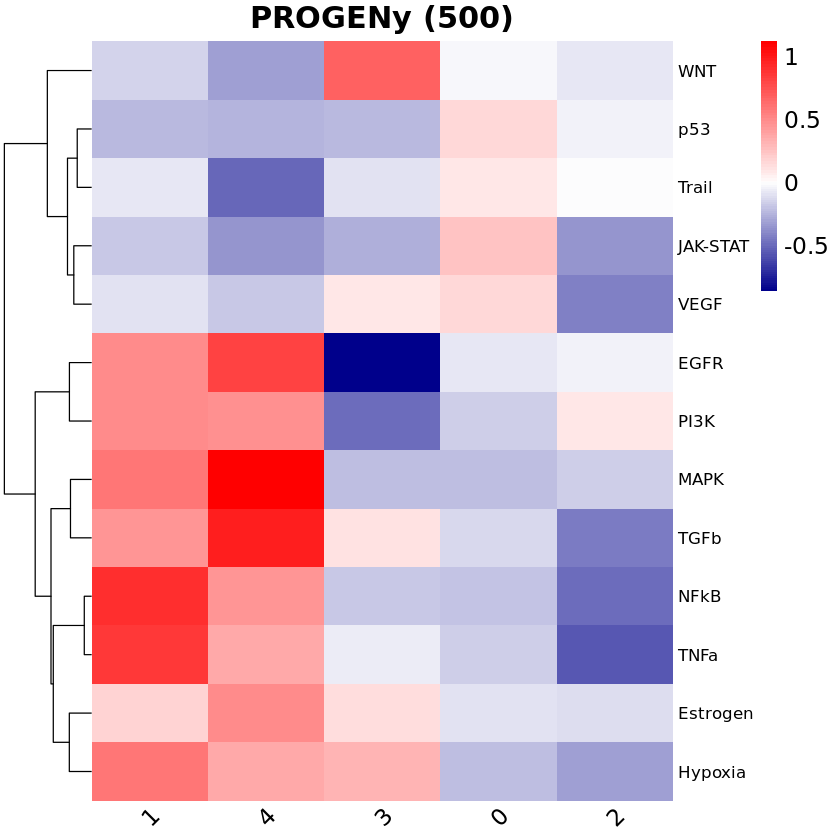

In [81]:
paletteLength = 100
myColor = colorRampPalette(c("Darkblue", "white","red"))(paletteLength)

progenyBreaks = c(seq(min(summarized_progeny_scores_df), 0, 
                      length.out=ceiling(paletteLength/2) + 1),
                  seq(max(summarized_progeny_scores_df)/paletteLength, 
                      max(summarized_progeny_scores_df), 
                      length.out=floor(paletteLength/2)))
progeny_hmap = pheatmap(t(summarized_progeny_scores_df[,-1]),fontsize=14, 
                        fontsize_row = 10, 
                        color=myColor, breaks = progenyBreaks, 
                        main = "PROGENy (500)", angle_col = 45,
                        treeheight_col = 0,  border_color = NA)

ggsave("ProgenyPlot.pdf", height = 4, width = 8, units = "in", useDingbats = F)
system(paste0("gsutil cp ProgenyPlot.pdf gs://fc-943d6020-b7d7-4091-b0d4-51cc6cb7617e/Macrophage_Figure/"), intern=TRUE)


In [82]:
saveRDS(seurat.all.data.sub,file="macrophage_mainfig.rds")
system(paste0("gsutil cp macrophage_mainfig.rds gs://fc-943d6020-b7d7-4091-b0d4-51cc6cb7617e/Macrophage_Figure/"), intern=TRUE)



character(0)

# Create Macrophage Figures

character(0)

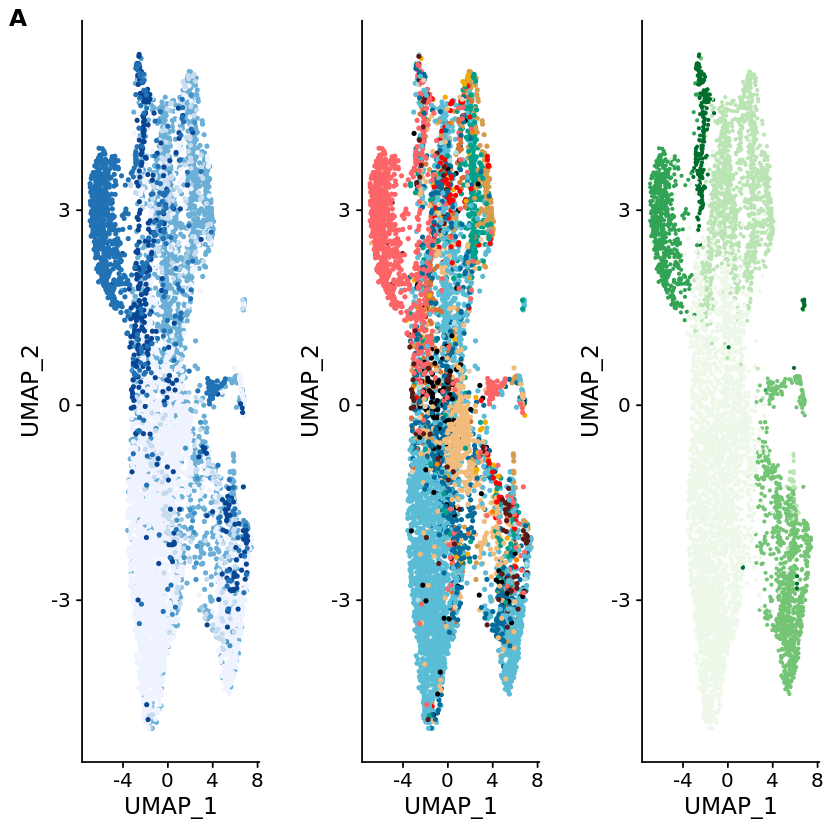

In [83]:
A <- ggarrange(stagetsne.NOL, donortsne.NOL, subclust.NOL,
                    labels = c("A"),
                    ncol = 3, nrow = 1)
A
ggsave("Umaps_Figure.pdf", useDingbats = F, height = 4, width = 8, units = "in")
system(paste0("gsutil cp Umaps_Figure.pdf gs://fc-943d6020-b7d7-4091-b0d4-51cc6cb7617e/Macrophage_Figure/"), intern=TRUE)


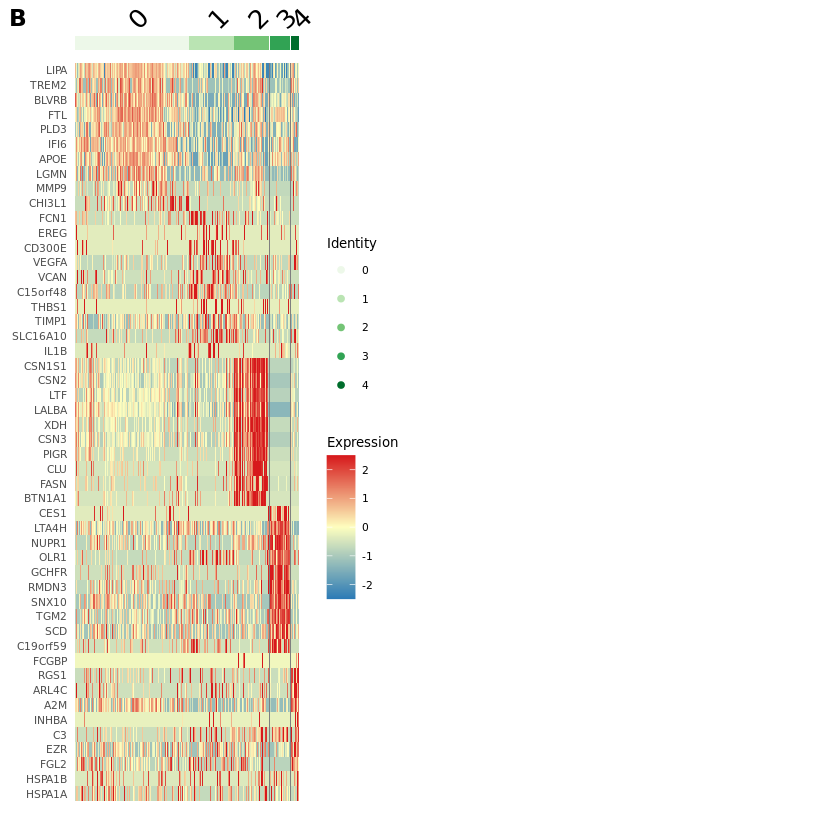

In [84]:
B <- ggarrange(DEmap,labels = c("B"),ncol = 2, nrow = 1)
B

character(0)

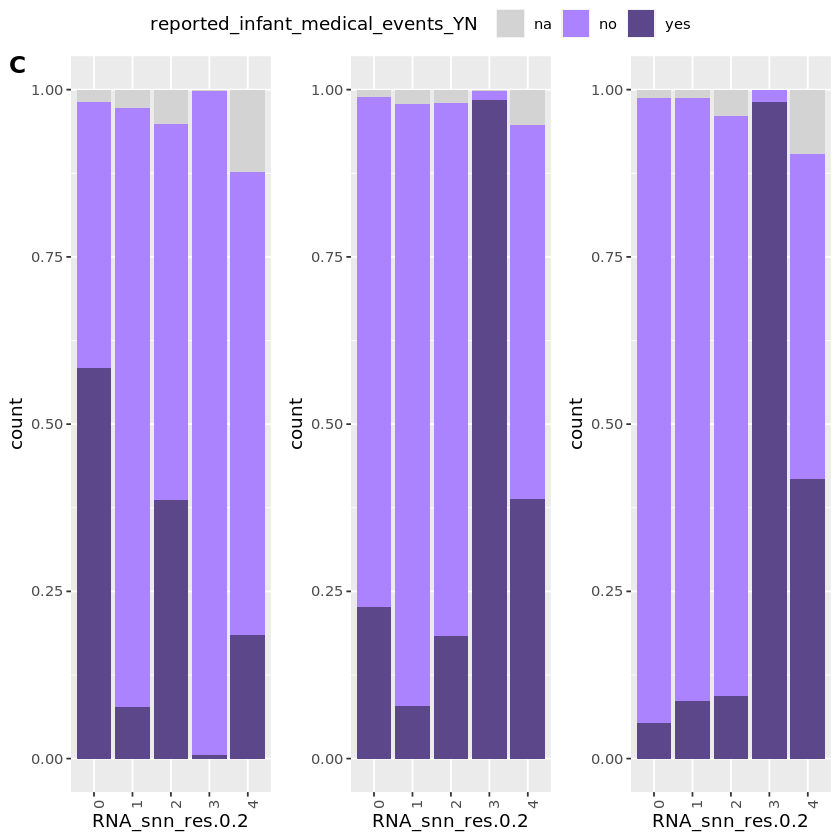

In [22]:
B <- ggarrange(medgg,formulagg,daycaregg,labels = c("C"), nrow = 1,common.legend = TRUE)
B
ggsave("BarchartforFigure.pdf", useDingbats = F, height = 4, width = 8, units = "in")
system(paste0("gsutil cp BarchartforFigure.pdf gs://fc-943d6020-b7d7-4091-b0d4-51cc6cb7617e/Macrophage_Figure/"), intern=TRUE)


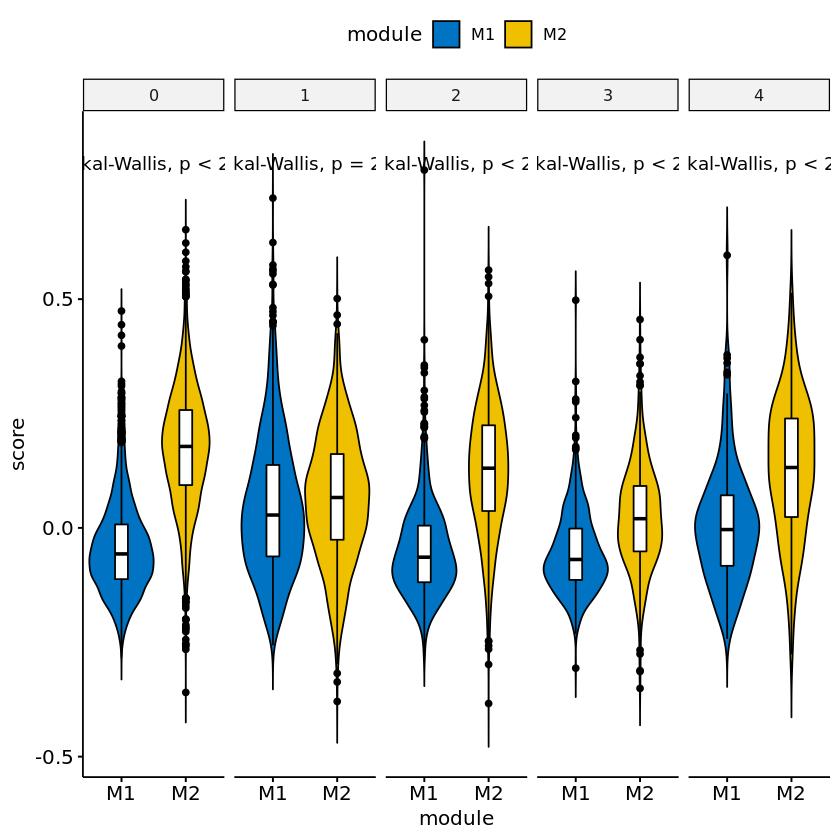

In [86]:
M2M1Scores

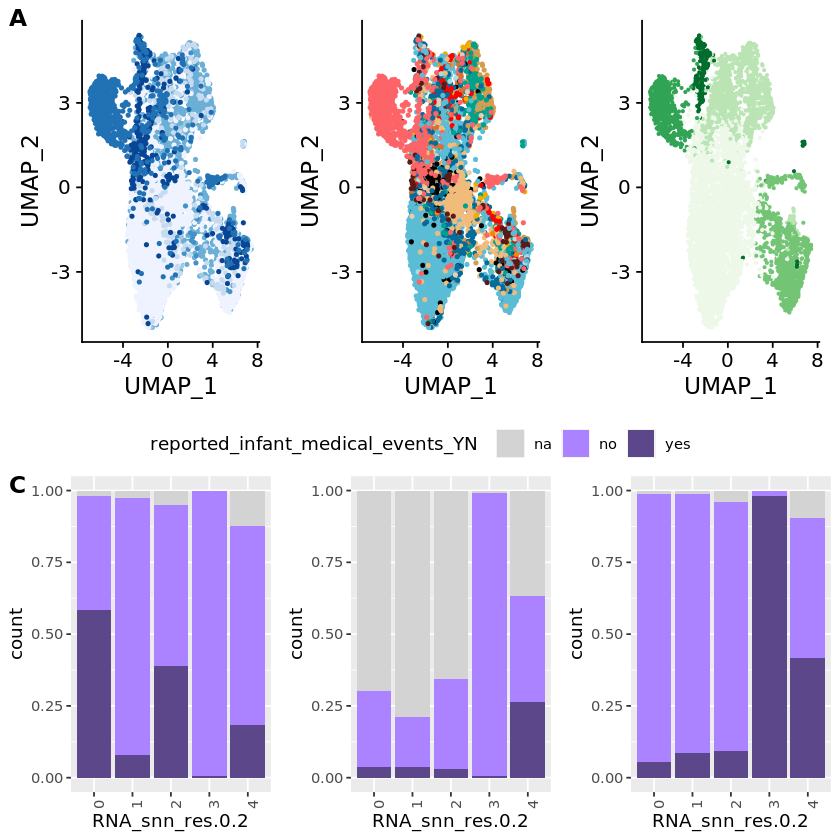

In [87]:
left <- ggarrange(A,B, nrow = 2)
left

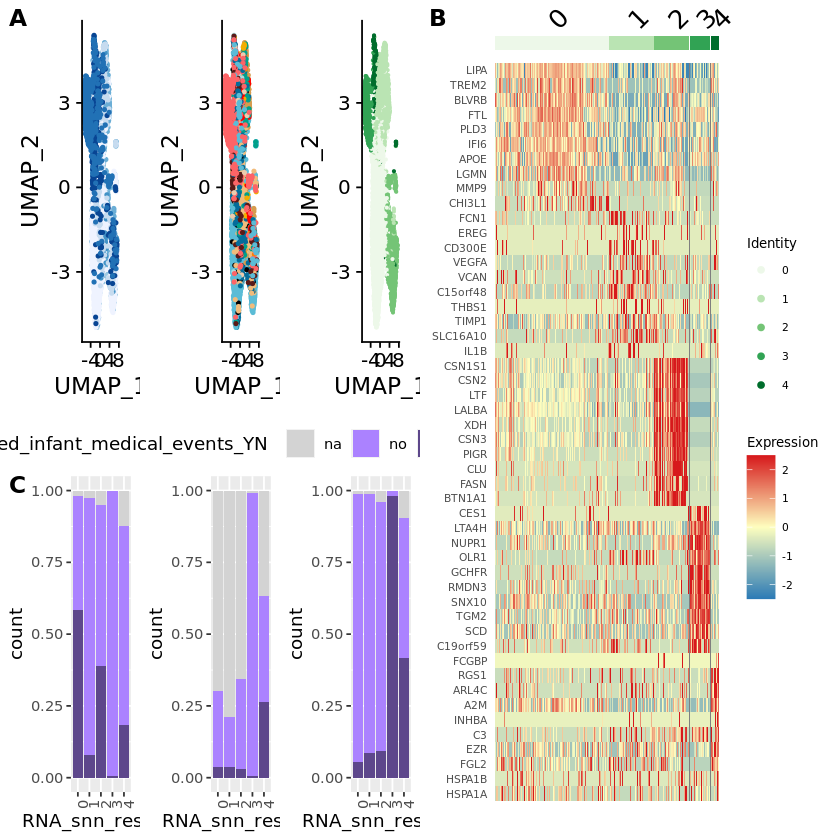

In [88]:
Main.Figure <- ggarrange(left, DEmap,labels = c("","B"), nrow = 1)
Main.Figure

character(0)

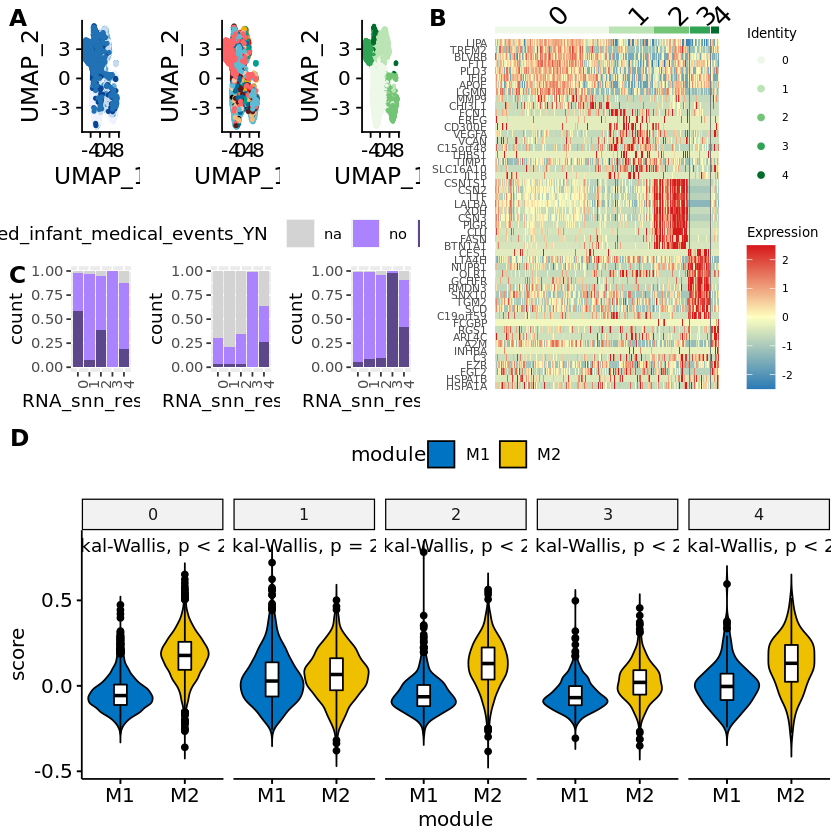

In [89]:
Main.Figure.final <- ggarrange(Main.Figure,M2M1Scores, labels = c("","D"), nrow = 2)
Main.Figure.final
ggsave("MainFigure_m1m2scores.pdf", useDingbats = F, height = 10, width = 8, units = "in")
system(paste0("gsutil cp MainFigure_m1m2scores.pdf gs://fc-943d6020-b7d7-4091-b0d4-51cc6cb7617e/Macrophage_Figure/"), intern=TRUE)


In [187]:
class(Main.Figure.final)

[1] "gg"        "ggplot"    "ggarrange"

# Reactome Summary barcharts 

In [23]:
sig.reactome <- read.csv(pipe('gsutil cat gs://fc-943d6020-b7d7-4091-b0d4-51cc6cb7617e/Macrophage_Figure/merged_sig.csv'))
head(sig.reactome)


Unique_ID                                                     Cluster 
1 Degradation of the extracellular matrixcluster 0              cluster0
2 MHC class II antigen presentationcluster 0                    cluster0
3 Binding and Uptake of Ligands by Scavenger Receptorscluster 0 cluster0
4 Neutrophil degranulationcluster 0                             cluster0
5 Interferon alpha/beta signalingcluster 0                      cluster0
6 Downstream TCR signalingcluster 1                             cluster1
  Pathway.identifier Pathway.name                                        
1 R-HSA-1474228      Degradation of the extracellular matrix             
2 R-HSA-2132295      MHC class II antigen presentation                   
3 R-HSA-2173782      Binding and Uptake of Ligands by Scavenger Receptors
4 R-HSA-6798695      Neutrophil degranulation                            
5 R-HSA-909733       Interferon alpha/beta signaling                     
6 R-HSA-202424       Downstream TCR signaling                            
  Entities.pValue negLog_pVal Entities.FDR negLog_FDR
1 2.218718e-02    1.653898    0.459075375  0.3381160 
2 2.539098e-02    1.595321    0.459075375  0.3381160 
3 2.322878e-02    1.633974    0.459075375  0.3381160 
4 1.798400e-03    2.745114    0.365075129  0.4376178 
5 5.820000e-04    3.235077    0.354431378  0.4504678 
6 5.590000e-09    8.252588    0.000000576  6.2395775 
  Submitted.entities.found                       
1 SPP1;CTSD;MMP9                                 
2 HLA-DMB;CTSD;LGMN                              
3 CD163;APOE;FTL                                 
4 CHIT1;GM2A;CHI3L1;CTSD;MMP9;FTL                
5 OAS3;MX1;IFI6                                  
6 NFKBIA;HLA-DPB1;HLA-DRA;HLA-DRB1;NFKB1;HLA-DPA1

character(0)

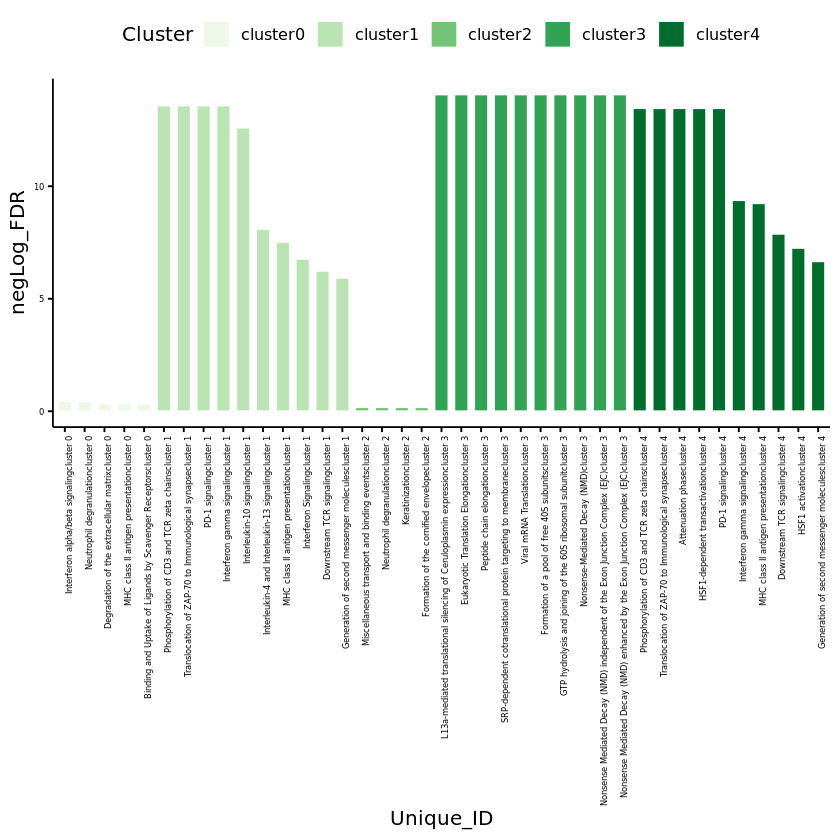

In [25]:
ggbarplot(sig.reactome, x = "Unique_ID", y = "negLog_FDR",
          fill = "Cluster",           # change fill color by cluster
          color = "white",            # Set bar border colors to white
          palette = cols.subclusters,            # jco journal color palett. see ?ggpar
          sort.val = "desc",          # Sort the value in dscending order
          sort.by.groups = TRUE,     # Don't sort inside each group
          x.text.angle = 90,           # Rotate vertically x axis texts
          ) + font("xy.text", size = 5)
ggsave("Enrichments.pdf", useDingbats = F, height = 10, width = 8, units = "in")
system(paste0("gsutil cp Enrichments.pdf gs://fc-943d6020-b7d7-4091-b0d4-51cc6cb7617e/Macrophage_Figure/"), intern=TRUE)


character(0)

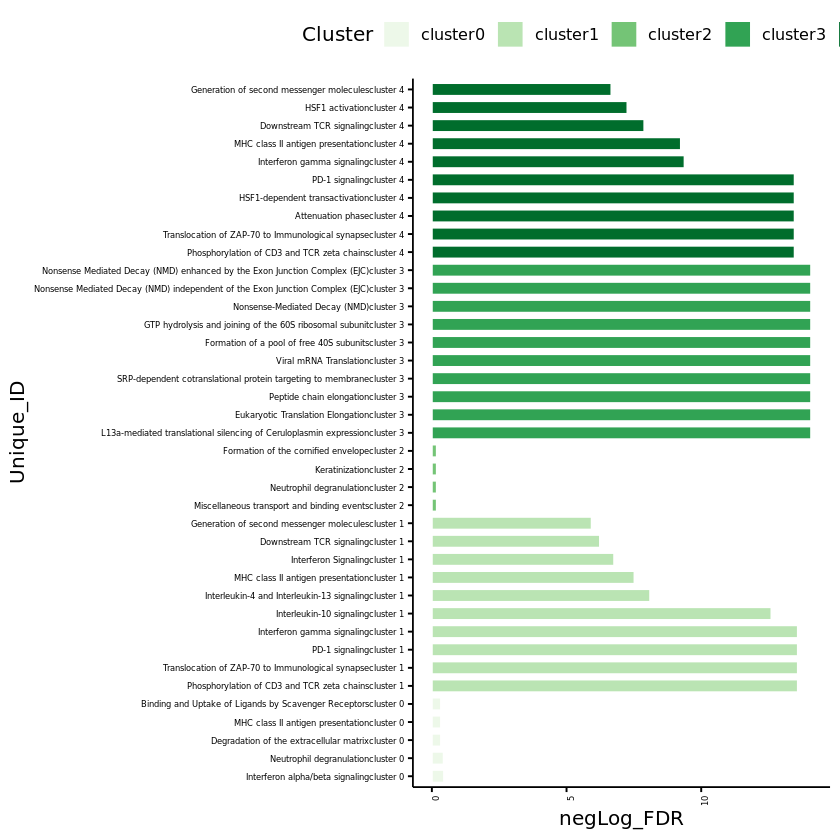

In [25]:
ggbarplot(sig.reactome, x = "Unique_ID", y = "negLog_FDR",
          fill = "Cluster",           # change fill color by cluster
          color = "white",            # Set bar border colors to white
          palette = cols.subclusters,            # jco journal color palett. see ?ggpar
          sort.val = "desc",          # Sort the value in dscending order
          group = "Cluster",
          rotate = TRUE,
          sort.by.groups = TRUE,     # Don't sort inside each group
          x.text.angle = 90,           # Rotate vertically x axis texts
          ) + font("xy.text", size = 5)
ggsave("Enrichments_bar.pdf", useDingbats = F, height = 10, width = 8, units = "in")
system(paste0("gsutil cp Enrichments_bar.pdf gs://fc-943d6020-b7d7-4091-b0d4-51cc6cb7617e/Macrophage_Figure/"), intern=TRUE)


character(0)

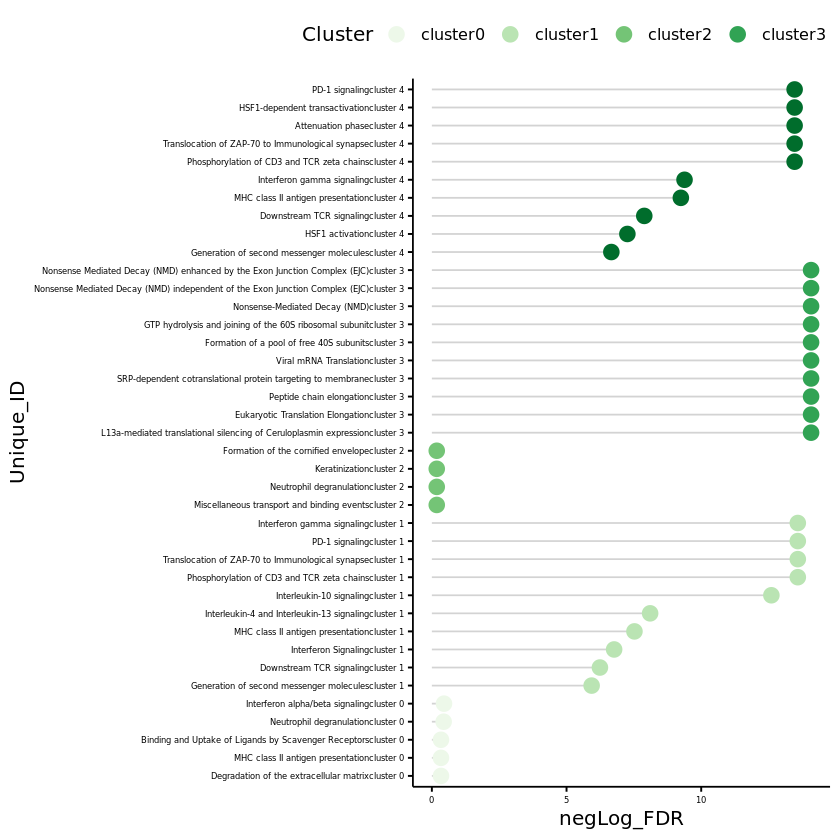

In [26]:
ggdotchart(sig.reactome, x = "Unique_ID", y = "negLog_FDR",
           color = "Cluster",                                # Color by groups
           palette = cols.subclusters, # Custom color palette
           sorting = "descending",                       # Sort value in descending order
           add = "segments",                             # Add segments from y = 0 to dots
           rotate = TRUE,                                # Rotate vertically
           group = "Cluster",                                # Order by groups
           dot.size = 4,                                 # Large dot size
           font.label = list(color = "white", size = 9, 
                             vjust = 0.5),               # Adjust label parameters
           ggtheme = theme_pubr()                        # ggplot2 theme
           ) + font("xy.text", size = 5)
ggsave("Enrichments_dotchart_grouped.pdf", useDingbats = F, height = 10, width = 8, units = "in")
system(paste0("gsutil cp Enrichments_dotchart_grouped.pdf gs://fc-943d6020-b7d7-4091-b0d4-51cc6cb7617e/Macrophage_Figure/"), intern=TRUE)


character(0)

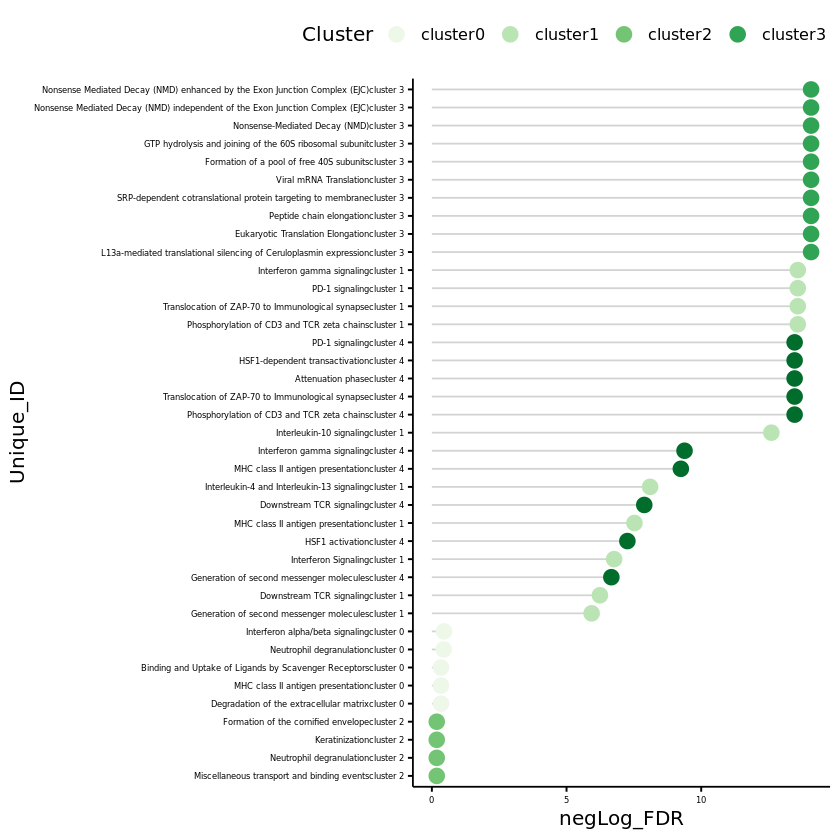

In [27]:
ggdotchart(sig.reactome, x = "Unique_ID", y = "negLog_FDR",
           color = "Cluster",                                # Color by groups
           palette = cols.subclusters, # Custom color palette
           sorting = "descending",                       # Sort value in descending order
           add = "segments",                             # Add segments from y = 0 to dots
           rotate = TRUE,                                # Rotate vertically
           dot.size = 4,                                 # Large dot size
           font.label = list(color = "white", size = 9, 
                             vjust = 0.5),               # Adjust label parameters
           ggtheme = theme_pubr()                        # ggplot2 theme
           ) + font("xy.text", size = 5)
ggsave("Enrichments_dotchart_ordered.pdf", useDingbats = F, height = 10, width = 8, units = "in")
system(paste0("gsutil cp Enrichments_dotchart_ordered.pdf gs://fc-943d6020-b7d7-4091-b0d4-51cc6cb7617e/Macrophage_Figure/"), intern=TRUE)


# Create Figure with reactome summary

In [100]:
reactome.res <- ggdotchart(sig.reactome, x = "Unique_ID", y = "negLog_FDR",
           color = "Cluster",                                # Color by groups
           palette = cols.subclusters, # Custom color palette
           sorting = "descending",                       # Sort value in descending order
           add = "segments",                             # Add segments from y = 0 to dots
           rotate = TRUE,                                # Rotate vertically
           dot.size = 4,                                 # Large dot size
           font.label = list(color = "white", size = 9, 
                             vjust = 0.5),               # Adjust label parameters
           ggtheme = theme_pubr()                        # ggplot2 theme
           ) + font("xy.text", size = 5)

character(0)

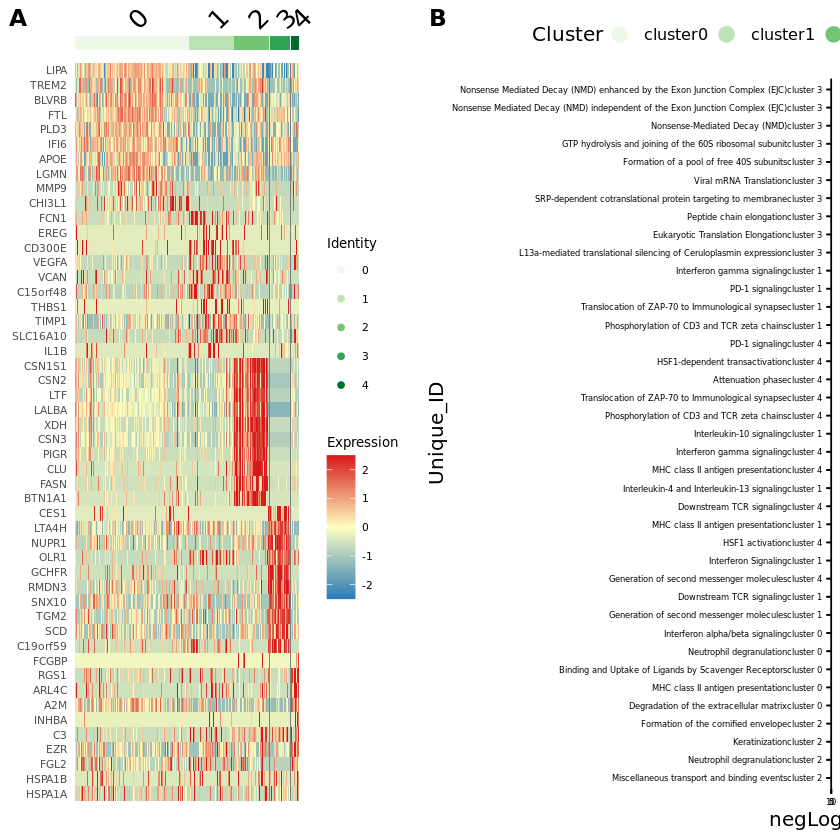

In [104]:
heatmap_reactome <- ggarrange(DEmap, reactome.res, labels = c("A","B"))
heatmap_reactome
ggsave("heatmap_reactome_fig.pdf", useDingbats = F, height = 5, width = 12, units = "in")
system(paste0("gsutil cp heatmap_reactome_fig.pdf gs://fc-943d6020-b7d7-4091-b0d4-51cc6cb7617e/Macrophage_Figure/"), intern=TRUE)


## Hormone Feature Plots

Warning message in FetchData(object = object, vars = features, cells = cells):
“The following requested variables were not found: NR3B3”


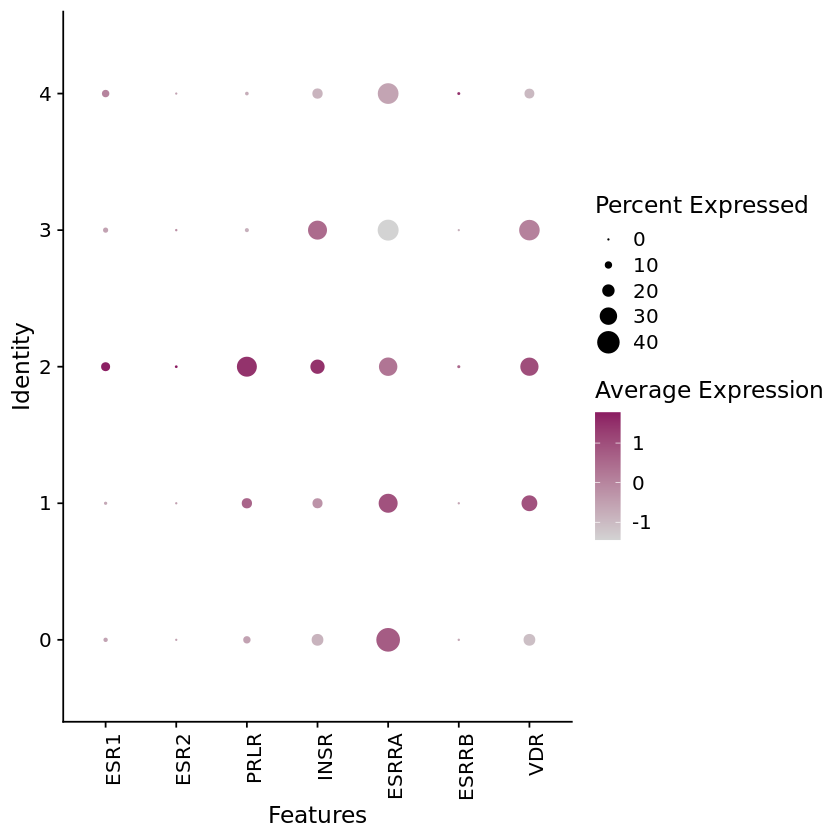

In [13]:
Idents(object=seurat.all.data.sub) <- "RNA_snn_res.0.2"
DotPlot(seurat.all.data.sub, features = c("ESR1","ESR2","PRLR","INSR","ESRRA","ESRRB","NR3B3","VDR"), cols = c("lightgrey", "maroon4")) + theme(axis.text.x = element_text(angle = 90, hjust = 1))


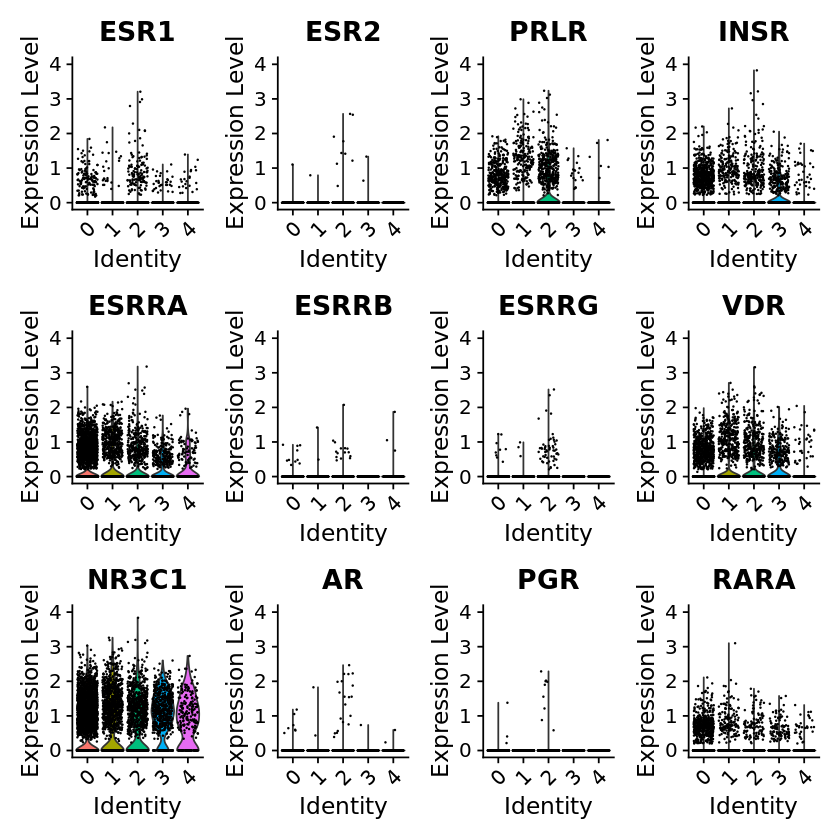

In [19]:
VlnPlot(seurat.all.data.sub, features = c("ESR1","ESR2","PRLR","INSR","ESRRA","ESRRB","ESRRG","VDR","NR3C1",
                                          "AR","PGR","RARA"), y.max = 4)
